# Data Cleaning

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/AB_NYC_2019.csv', parse_dates=['last_review'])

In [ ]:
df_clean = df.drop(['name', 'host_name', 'calculated_host_listings_count'], axis=1)

In [ ]:
df_clean

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,availability_365
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,365
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,355
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,365
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,194
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaT,NaN,9
48891,36485057,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaT,NaN,36
48892,36485431,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaT,NaN,27
48893,36485609,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaT,NaN,2


## Missing values check

In [ ]:
df[df.latitude.isna()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


In [ ]:
df[df['price'].isna()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


In [ ]:
df['availability_365'].describe()

count    48895.000000
mean       112.781327
std        131.622289
min          0.000000
25%          0.000000
50%         45.000000
75%        227.000000
max        365.000000
Name: availability_365, dtype: float64

In [ ]:
df[df['last_review'].isna()]['number_of_reviews'].unique()

array([0])

## Redundant column check

In [ ]:
temp = df[['host_id', 'calculated_host_listings_count']]
temp['count'] = 1
counts = temp.groupby('host_id')['count'].sum()
given = temp.groupby('host_id')['calculated_host_listings_count'].last()
check_equal = given.to_frame('given').join(counts)
check_equal[check_equal['given'] != check_equal['count']]

<ipython-input-11-03f3133b8d70>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['count'] = 1


,given,count
host_id,,


## Categorical variable check

In [ ]:
df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)


# EDA


## Understanding data frame

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48895 non-null  int64         
 1   name                            48879 non-null  object        
 2   host_id                         48895 non-null  int64         
 3   host_name                       48874 non-null  object        
 4   neighbourhood_group             48895 non-null  object        
 5   neighbourhood                   48895 non-null  object        
 6   latitude                        48895 non-null  float64       
 7   longitude                       48895 non-null  float64       
 8   room_type                       48895 non-null  object        
 9   price                           48895 non-null  int64         
 10  minimum_nights                  48895 non-null  int64         
 11  nu

In [ ]:
#See the null values of our data set

df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
#See the top 10 of host

df_host=df['host_id'].value_counts().head(10)
df_host

host_id
219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
12243051      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: count, dtype: int64

In [ ]:
#first host named Sonder

sonder=df[df['host_id'] == 219517861]
sonder

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
38293,30181691,Sonder | 180 Water | Incredible 2BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70637,-74.00645,Entire home/apt,302,29,0,NaT,NaN,327,309
38294,30181945,Sonder | 180 Water | Premier 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70771,-74.00641,Entire home/apt,229,29,1,2019-05-29,0.73,327,219
38588,30347708,Sonder | 180 Water | Charming 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70743,-74.00443,Entire home/apt,232,29,1,2019-05-21,0.60,327,159
39769,30937590,Sonder | The Nash | Artsy 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Murray Hill,40.74792,-73.97614,Entire home/apt,262,2,8,2019-06-09,1.86,327,91
39770,30937591,Sonder | The Nash | Lovely Studio + Rooftop,219517861,Sonder (NYC),Manhattan,Murray Hill,40.74771,-73.97528,Entire home/apt,255,2,14,2019-06-10,2.59,327,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47691,35871510,Sonder | 116 John | Vibrant Studio + Fitness Room,219517861,Sonder (NYC),Manhattan,Financial District,40.70818,-74.00631,Entire home/apt,135,29,0,NaT,NaN,327,339
47692,35871511,Sonder | 116 John | Vibrant 1BR + Fitness Room,219517861,Sonder (NYC),Manhattan,Financial District,40.70691,-74.00682,Entire home/apt,165,29,0,NaT,NaN,327,342
47693,35871515,Sonder | 116 John | Stunning 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70772,-74.00673,Entire home/apt,165,29,0,NaT,NaN,327,347
47814,35936418,Sonder | 116 John | Polished Studio + Gym,219517861,Sonder (NYC),Manhattan,Financial District,40.70840,-74.00518,Entire home/apt,699,29,0,NaT,NaN,327,327


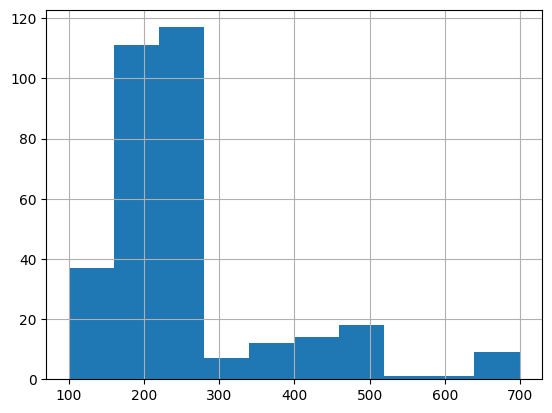

In [ ]:
#sonder's price distribution

sonder.price.hist();

## Distribution of each columns

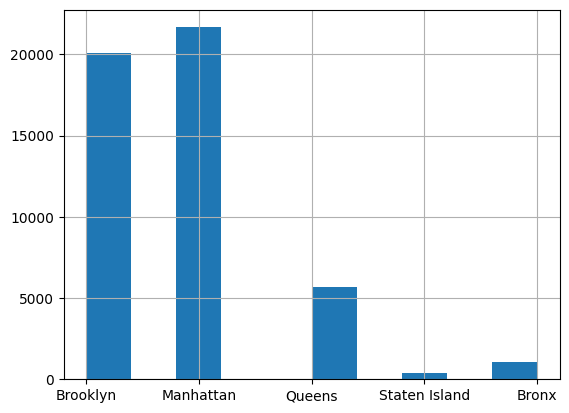

In [ ]:
#neighbourhood_group distribution

df.neighbourhood_group.hist();

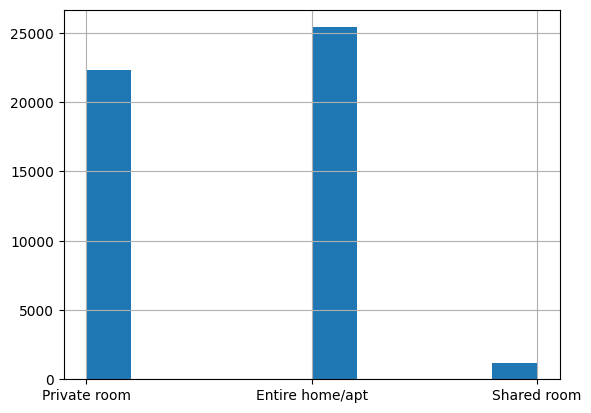

In [ ]:
#room_type distribution
df.room_type.hist();

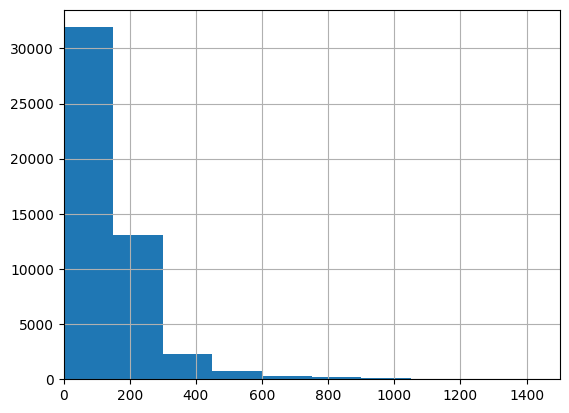

In [ ]:
#price distribution
df['price'].hist(range=(0, 1500))
plt.xlim(0, 1500)
plt.show()

<Axes: >

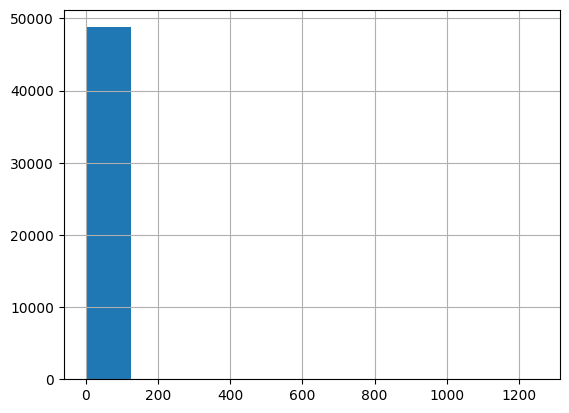

In [ ]:
#minimum_nights distribution
df.minimum_nights.hist()

<Axes: >

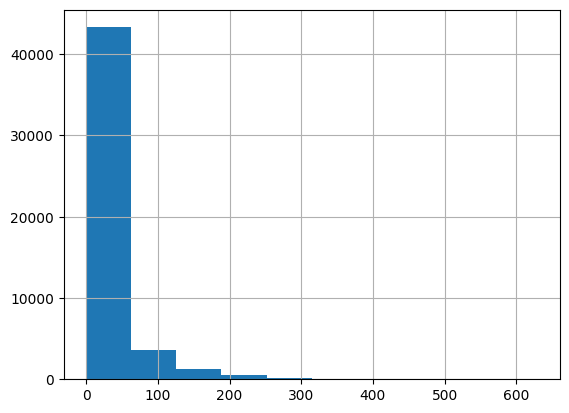

In [ ]:
#number_of_reviews distribution
df.number_of_reviews.hist()

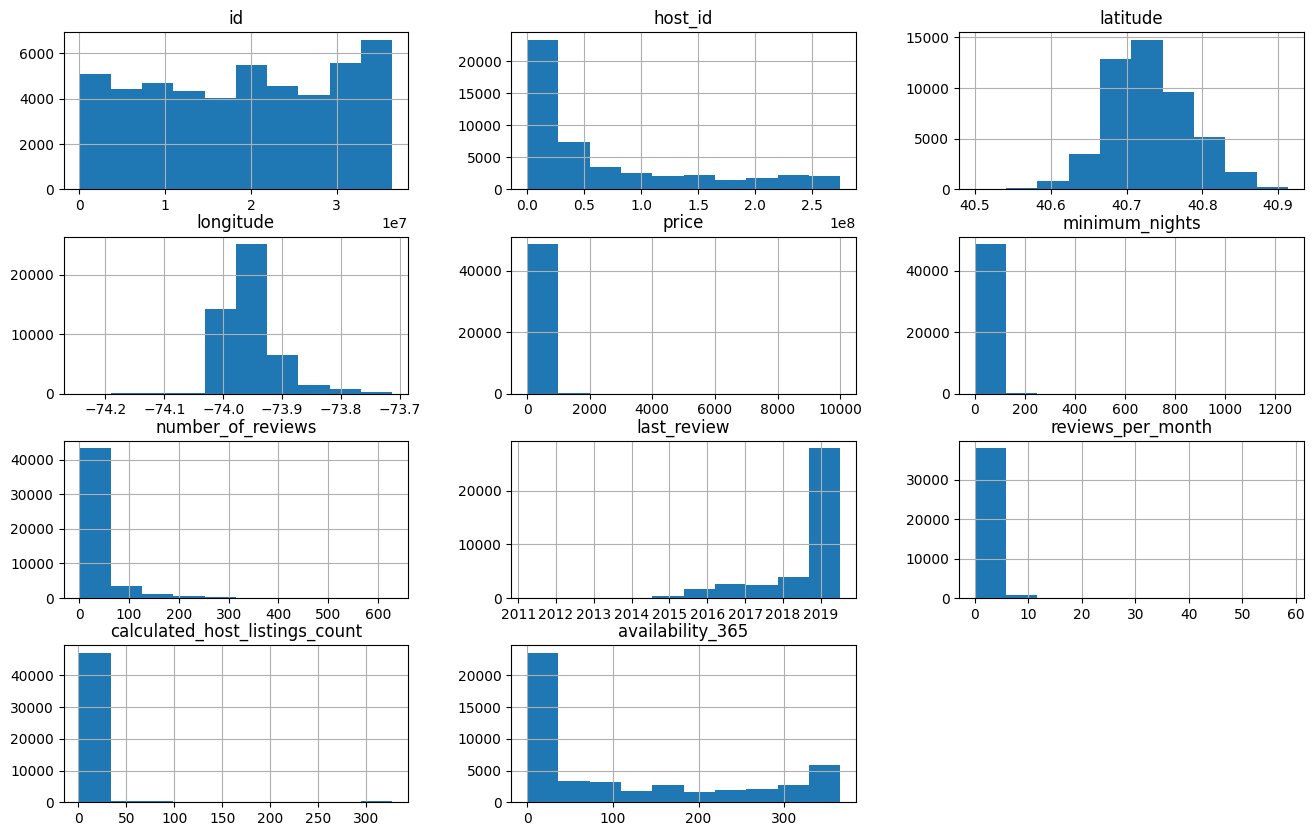

In [ ]:
#others

df.hist(figsize=(16,10));

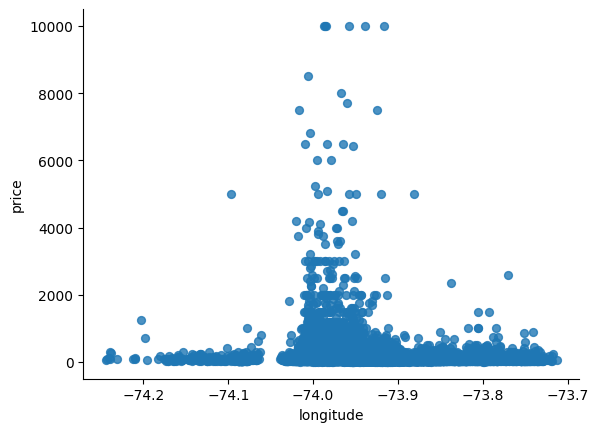

In [ ]:
# @title longitude vs price

from matplotlib import pyplot as plt
df_clean.plot(kind='scatter', x='longitude', y='price', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

## Correlation

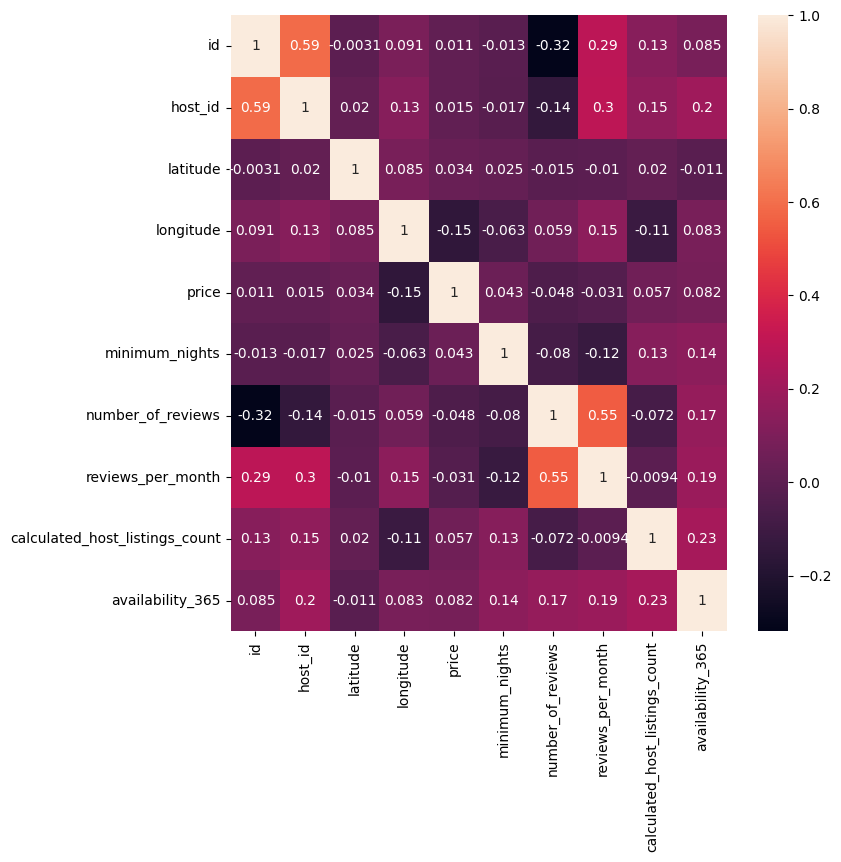

In [ ]:
# Showing correlation

df.corr(numeric_only=True)
plt.figure(figsize = (8,8))
sns.heatmap(df.corr(numeric_only=True), annot=True);
plt.show()

# **DATA VIZUALIZATION**

**1. Geographical Overview**

In [ ]:
import plotly.express as px

# Create a scatter mapbox plot
fig = px.scatter_mapbox(df,
                        lat="latitude",
                        lon="longitude",
                        color="price",
                        size="price",
                        color_continuous_scale=px.colors.cyclical.IceFire,
                        size_max=15,
                        zoom=10,
                        mapbox_style="carto-positron")

# Add a title to the map
fig.update_layout(title='Geographical Distribution of Airbnb Listings by Price')

# Show the map
fig.show()


**2. Market Composition**

Room Types Distribution

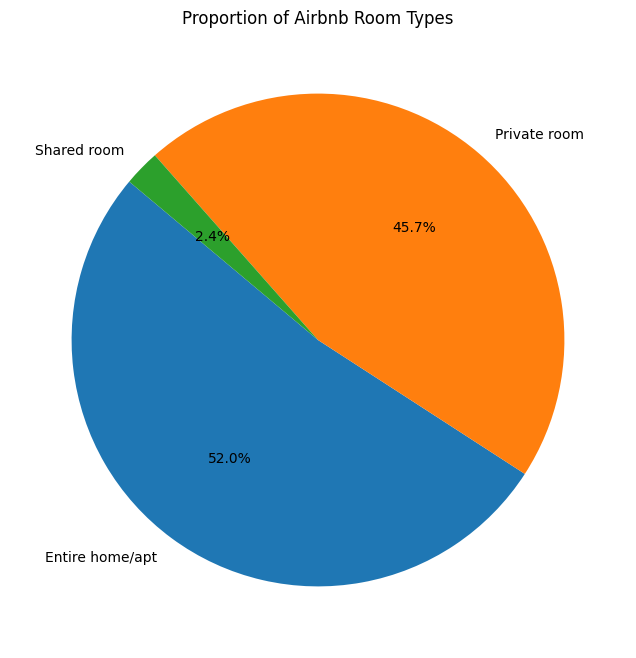

In [ ]:
# Pie Chart for the proportion of different room types
room_type_counts = df['room_type'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(room_type_counts, labels=room_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Airbnb Room Types')
plt.show()


Neighbourhood Group Distribution

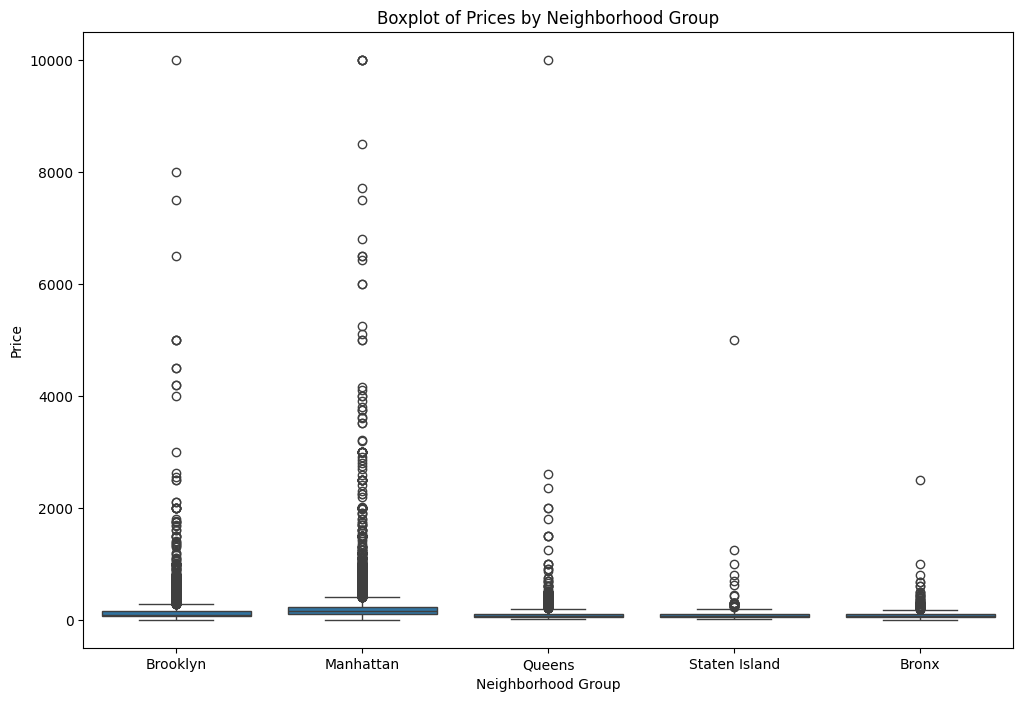

In [ ]:
# Boxplot of prices by neighborhood group
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='neighbourhood_group', y='price')
plt.title('Boxplot of Prices by Neighborhood Group')
plt.xlabel('Neighborhood Group')
plt.ylabel('Price')
plt.show()


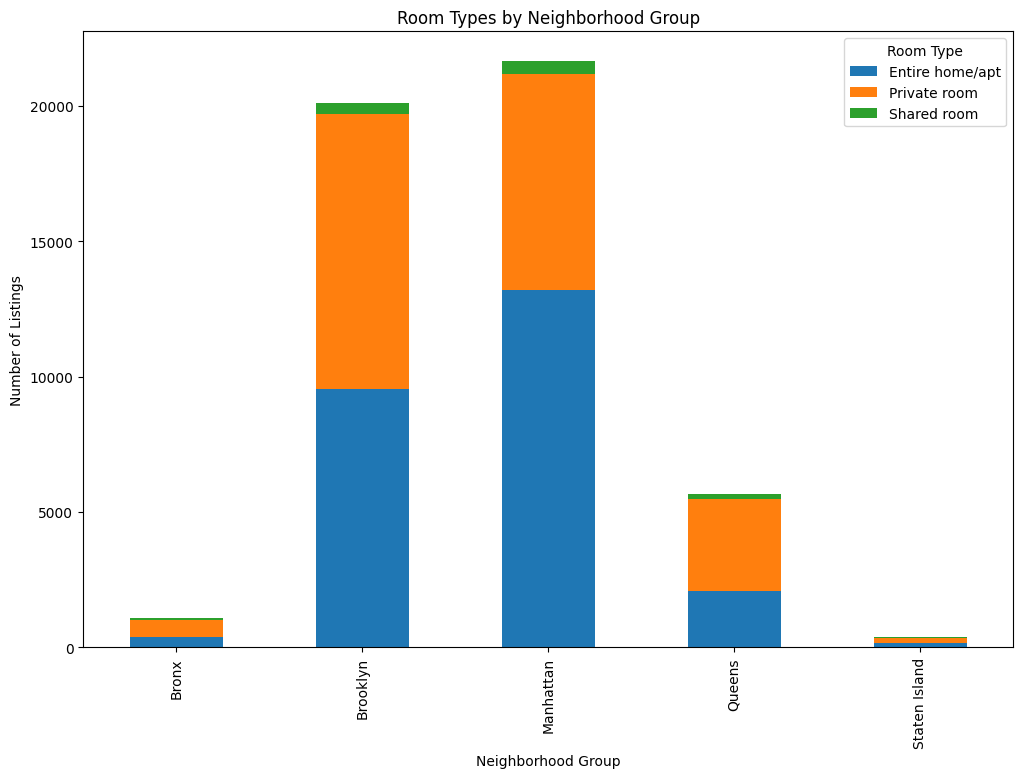

In [ ]:
# Stacked Bar Chart for the number of different room types available by neighborhood group
room_type_by_neighbourhood = df.groupby(['neighbourhood_group', 'room_type']).size().unstack()

room_type_by_neighbourhood.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Room Types by Neighborhood Group')
plt.xlabel('Neighborhood Group')
plt.ylabel('Number of Listings')
plt.legend(title='Room Type')
plt.show()

**3. Price Analysis**

Price Distribution

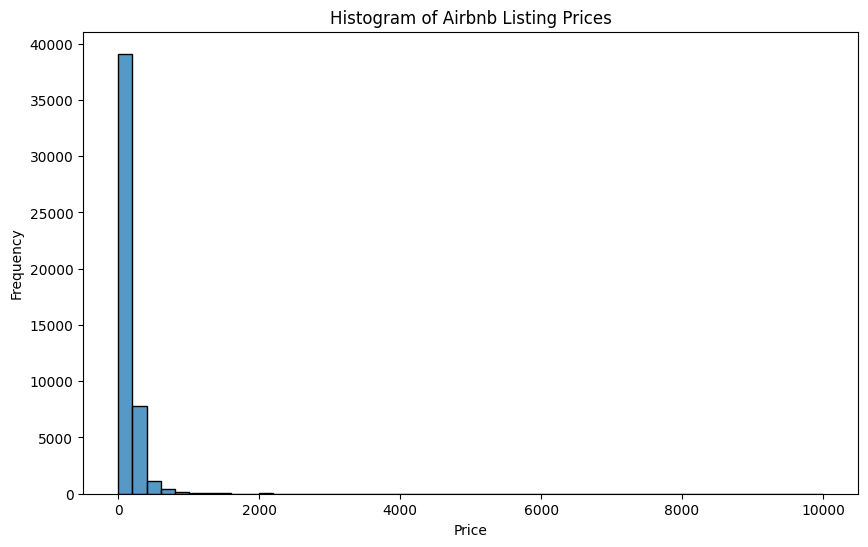

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of the price distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=False)
plt.title('Histogram of Airbnb Listing Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

Boxplots of Prices by Neighbourhood Group

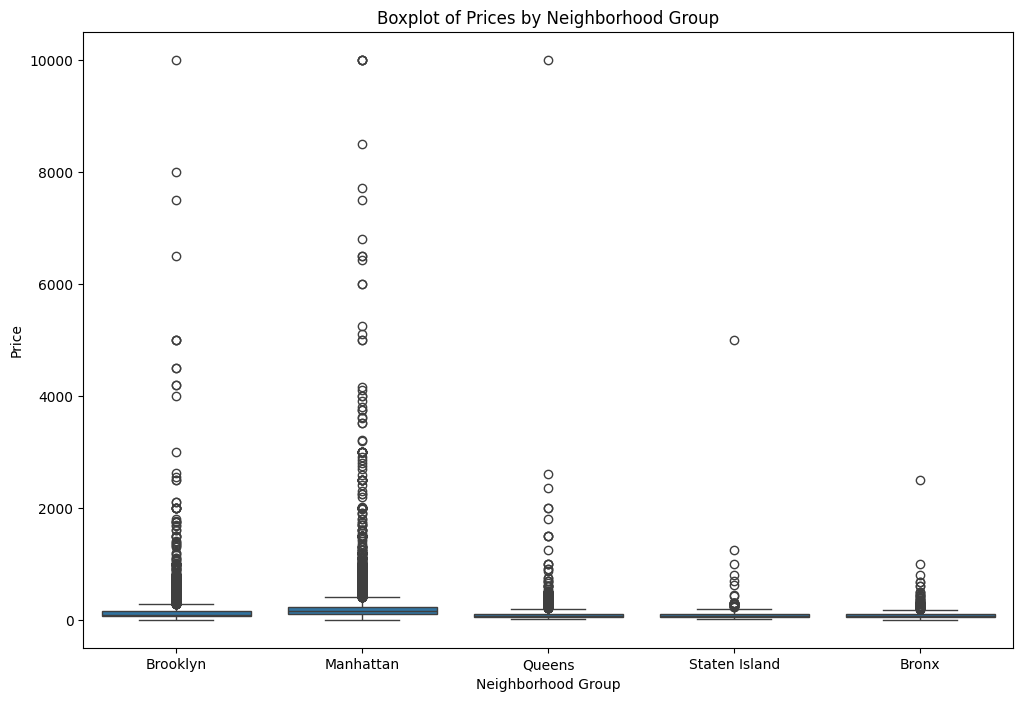

In [ ]:
# Boxplot of prices by neighborhood group
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='neighbourhood_group', y='price')
plt.title('Boxplot of Prices by Neighborhood Group')
plt.xlabel('Neighborhood Group')
plt.ylabel('Price')
plt.show()

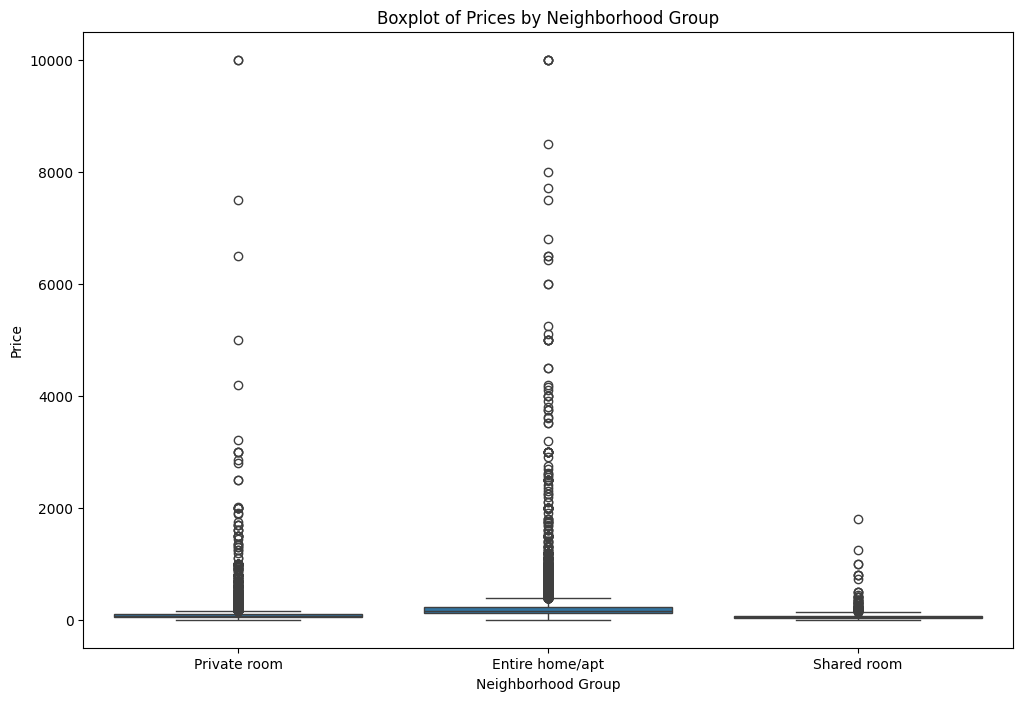

In [ ]:
# Boxplot of prices by room type
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='room_type', y='price')
plt.title('Boxplot of Prices by Neighborhood Group')
plt.xlabel('Neighborhood Group')
plt.ylabel('Price')
plt.show()


**4. Listing Popularity and Demand**

Popularity of Listings

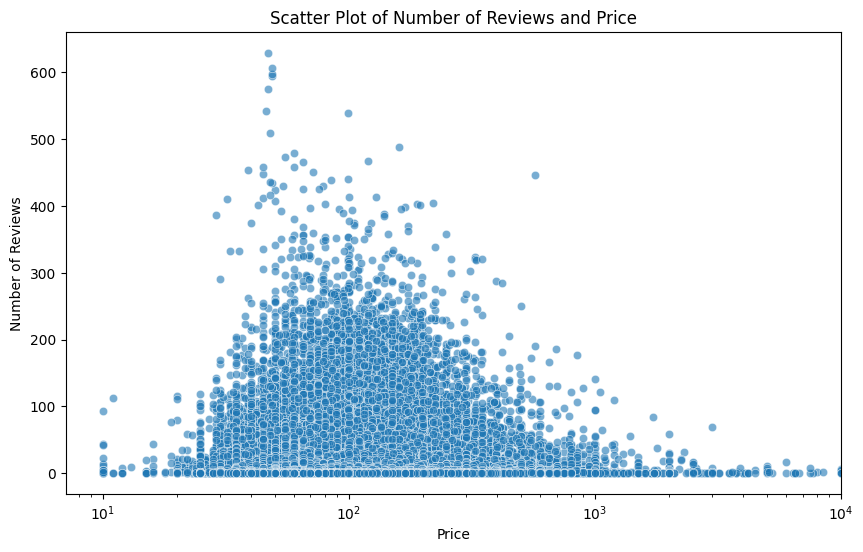

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='price', y='number_of_reviews', alpha=0.6)
plt.title('Scatter Plot of Number of Reviews and Price')
plt.xlabel('Price')
plt.ylabel('Number of Reviews')
plt.xscale('log')  # Log scale for price axis
plt.xlim(right=10000)  # Limit x-axis for visibility
plt.show()


<ipython-input-34-c13748e38f04>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




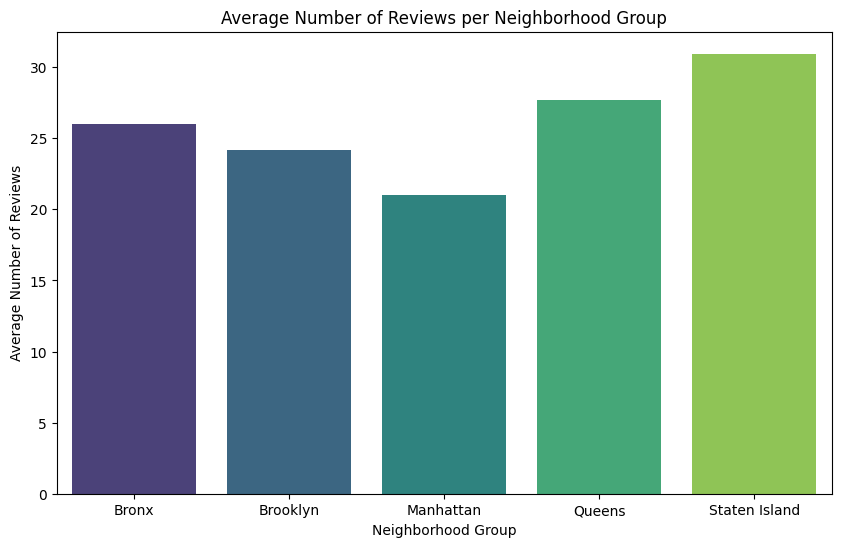

In [ ]:
#Average Number of Reviews per Neighbourhood Group
average_reviews = df.groupby('neighbourhood_group')['number_of_reviews'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=average_reviews, x='neighbourhood_group', y='number_of_reviews', palette='viridis')
plt.title('Average Number of Reviews per Neighborhood Group')
plt.xlabel('Neighborhood Group')
plt.ylabel('Average Number of Reviews')
plt.show()

**5. Host Dynamics**

Histogram of Listings Count per Host:

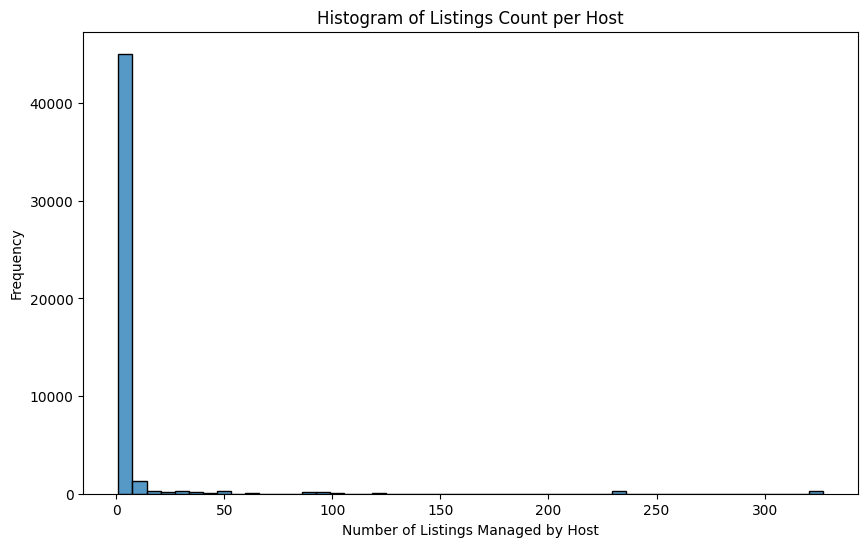

In [ ]:
# Histogram of the calculated_host_listings_count
plt.figure(figsize=(10, 6))
sns.histplot(df['calculated_host_listings_count'], bins=50, kde=False)
plt.title('Histogram of Listings Count per Host')
plt.xlabel('Number of Listings Managed by Host')
plt.ylabel('Frequency')
plt.show()

top_hosts = df['host_id'].value_counts().head(10)

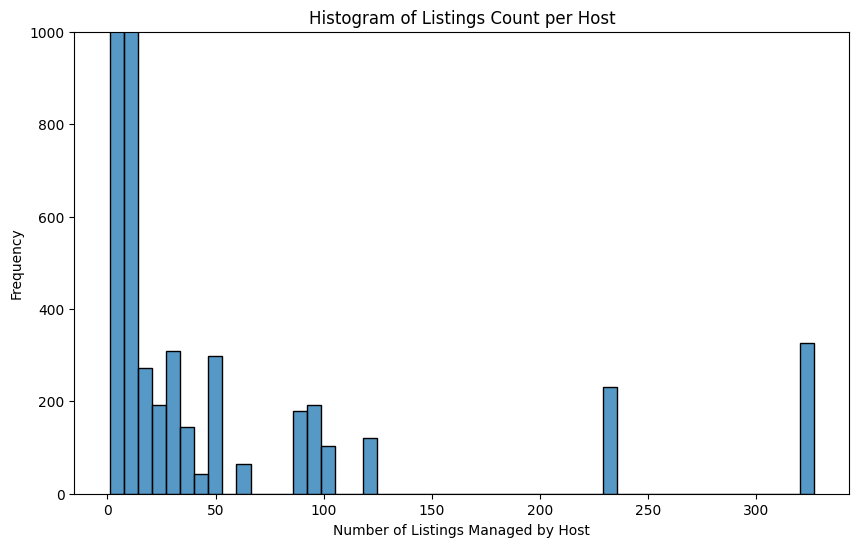

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['calculated_host_listings_count'], bins=50, kde=False)
plt.title('Histogram of Listings Count per Host')
plt.xlabel('Number of Listings Managed by Host')
plt.ylabel('Frequency')
plt.ylim(0, 1000)  # Set the y-axis limit to 1000 to focus on the majority of the data
plt.show()

Top Hosts by Number of Listings Managed:

<ipython-input-37-8c3ec6695f3a>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




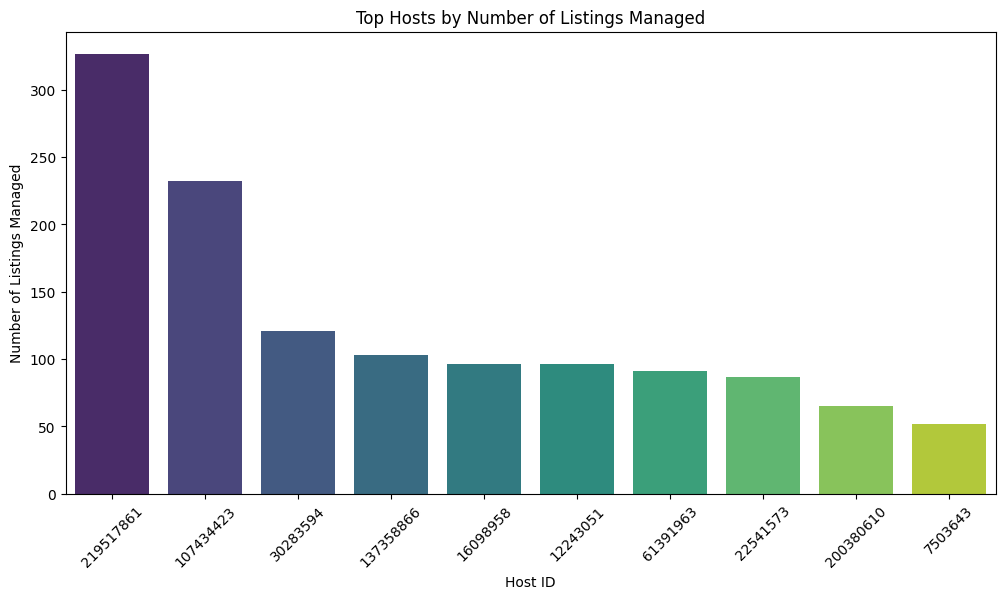

In [ ]:
top_hosts = df['host_id'].value_counts().head(10)  # This should be in descending order by default

# For DataFrame method, ensure descending order explicitly if needed
# top_hosts_df = top_hosts_df.sort_values(by='listing_count', ascending=False)

# Step 2: Plot using seaborn's barplot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_hosts.index.astype(str), y=top_hosts.values, palette='viridis', order=top_hosts.index.astype(str))
plt.title('Top Hosts by Number of Listings Managed')
plt.xlabel('Host ID')
plt.ylabel('Number of Listings Managed')
plt.xticks(rotation=45)
plt.show()

**6. Regulatory and Operational Insights**

Violin Plot for Minimum Nights Requirement by Neighbourhood Group: Offer insights into hosting strategies and possible regulatory impacts on the minimum stay duration.

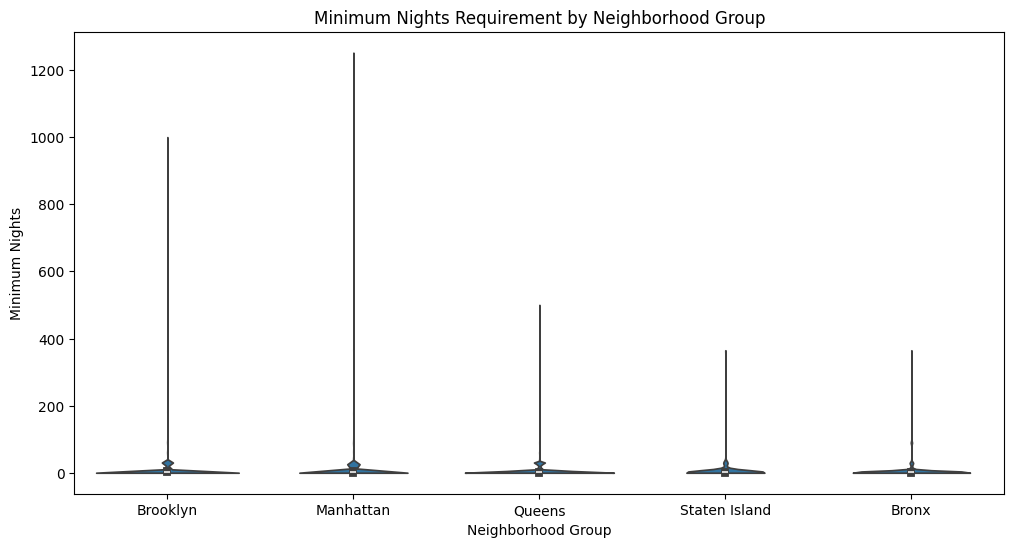

In [ ]:
# Violin plot for minimum nights required by neighborhood group
plt.figure(figsize=(12, 6))
sns.violinplot(x='neighbourhood_group', y='minimum_nights', data=df, cut=0)
plt.title('Minimum Nights Requirement by Neighborhood Group')
plt.xlabel('Neighborhood Group')
plt.ylabel('Minimum Nights')
plt.show()


Violin Plot for Minimum Nights Requirement by Room Type: Provide a similar analysis but focusing on how room types may affect minimum stay requirements.

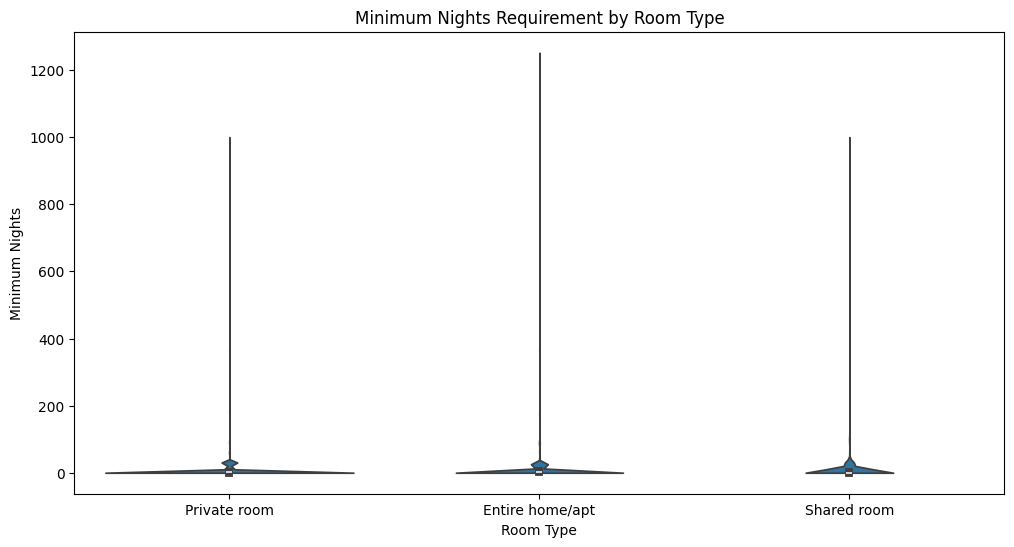

In [ ]:
#Violin Plot for Minimum Nights Requirement by Room Type:
plt.figure(figsize=(12, 6))
sns.violinplot(x='room_type', y='minimum_nights', data=df, cut=0)
plt.title('Minimum Nights Requirement by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Minimum Nights')
plt.show()

**7. Correlation Insights**
(unsure where it should be)


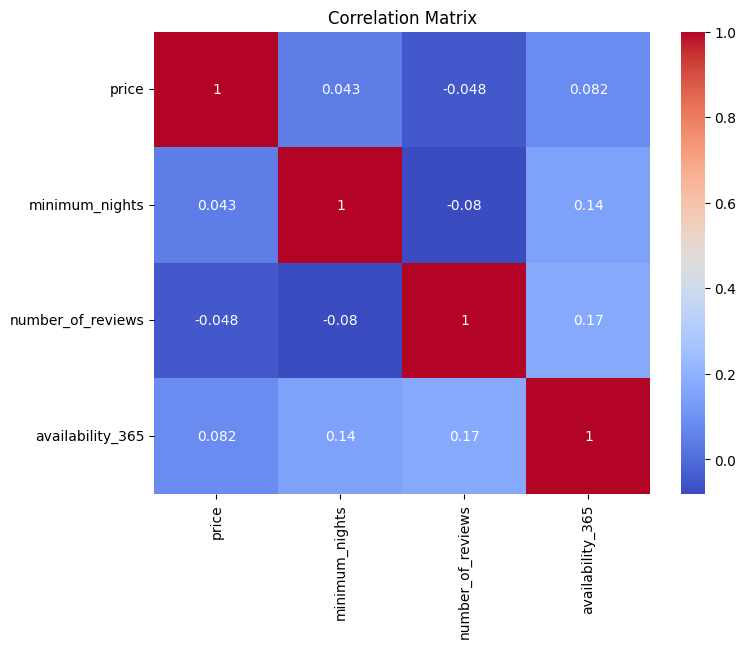

In [ ]:
correlation_matrix = df[['price', 'minimum_nights', 'number_of_reviews', 'availability_365']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

The correlations between price, minimum nights, number of reviews, and availability all look weak, implying that there is not a strong linear relationship between these variables in the Airbnb NYC dataset.

**8. Review Analysis**

Based on the column names provided from the AB_NYC_2019.csv dataset, there is no column explicitly indicate a numerical review score. Therefore, we try to derive insights from the data that we do have. Here, we use the number_of_reviews as a proxy to analyze the popularity of listings, with the assumption that more reviews might correlate with higher guest satisfaction or more frequent stays.

Start by "Popularity Analysis by Neighborhood or Room Type".


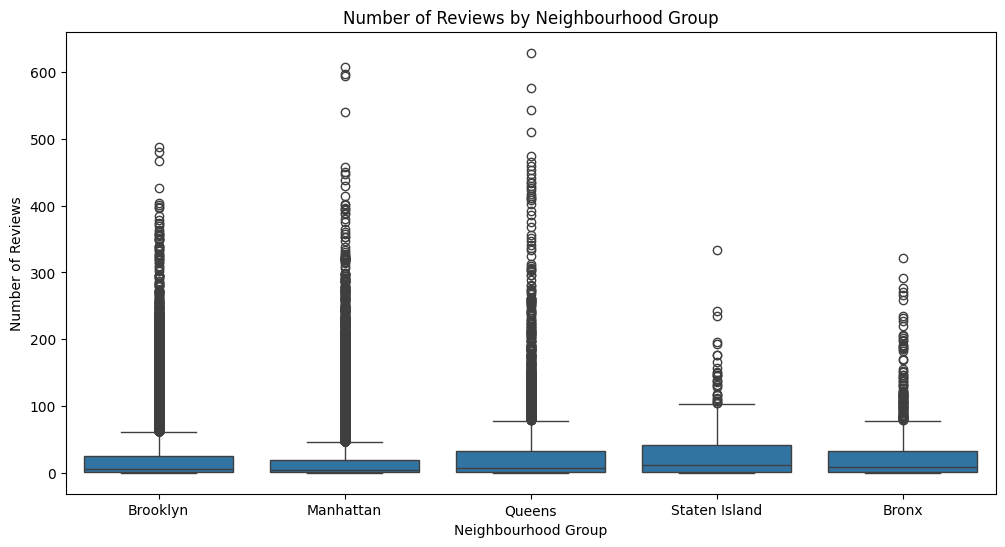

In [ ]:
# Compare the number of reviews across different neighbourhood groups
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='neighbourhood_group', y='number_of_reviews')
plt.title('Number of Reviews by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Number of Reviews')
plt.show()

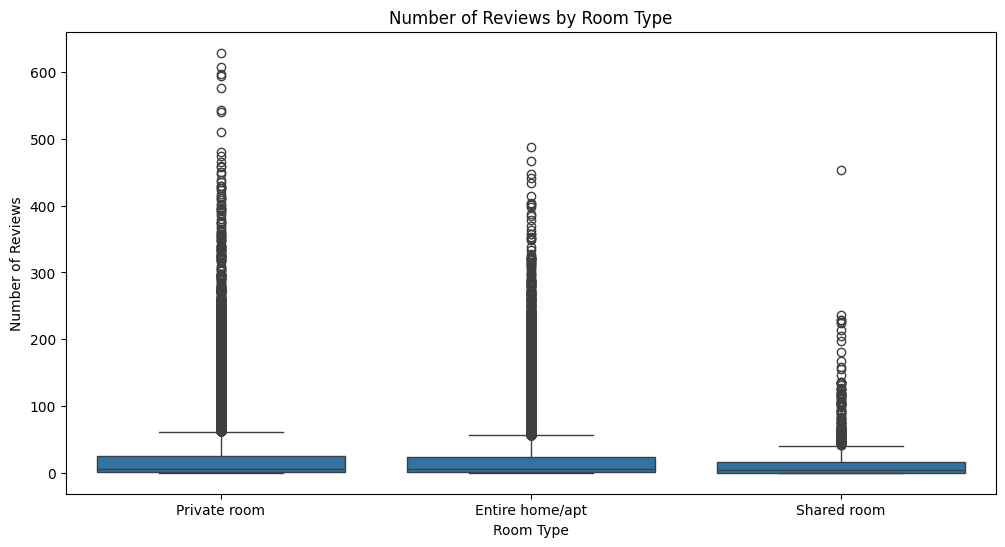

In [ ]:
# Compare the number of reviews across different neighbourhood groups
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='room_type', y='number_of_reviews')
plt.title('Number of Reviews by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Number of Reviews')
plt.show()

Price and Popularity Correlation

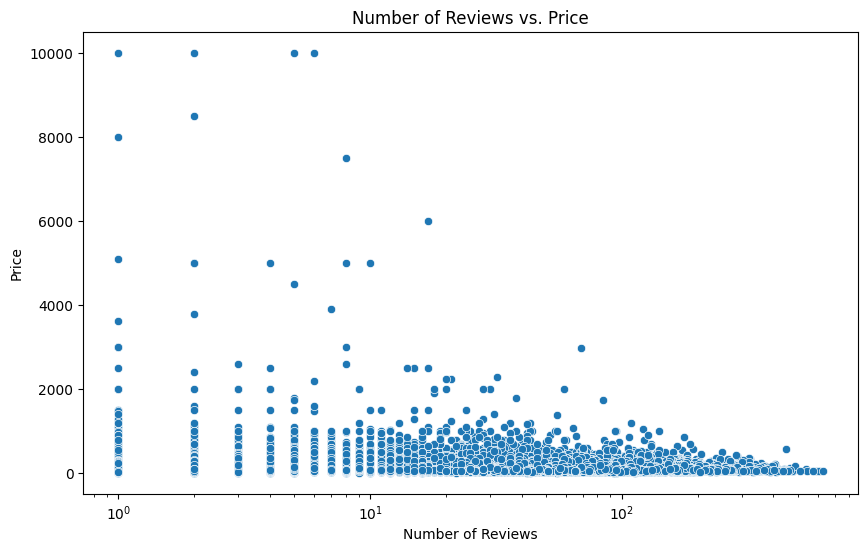

Correlation coefficient between number of reviews and price: -0.047954226582662185


In [ ]:
# Scatter plot for number of reviews vs. price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='number_of_reviews', y='price')
plt.title('Number of Reviews vs. Price')
plt.xlabel('Number of Reviews')
plt.ylabel('Price')
plt.xscale('log')  # Log scale for number of reviews axis if necessary due to wide range
plt.show()

# Calculate the correlation coefficient between number of reviews and price
corr_coef = df['number_of_reviews'].corr(df['price'])
print(f"Correlation coefficient between number of reviews and price: {corr_coef}")


While number_of_reviews can be a useful metric, it does not directly measure guest satisfaction the way a review score would. It is more an indicator of listing popularity and turnover rate.

**9. Analysis of Availability of Listings Throughout the Year**

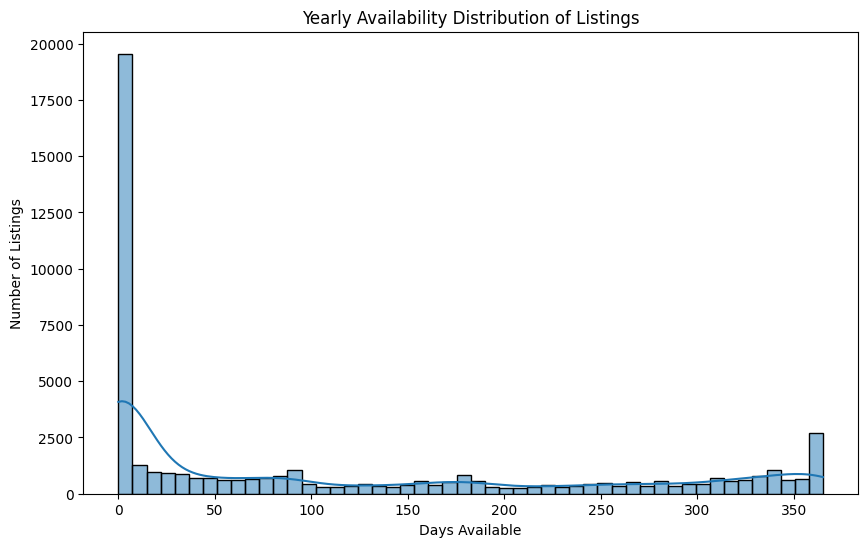

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['availability_365'], bins=50, kde=True)
plt.title('Yearly Availability Distribution of Listings')
plt.xlabel('Days Available')
plt.ylabel('Number of Listings')
plt.show()


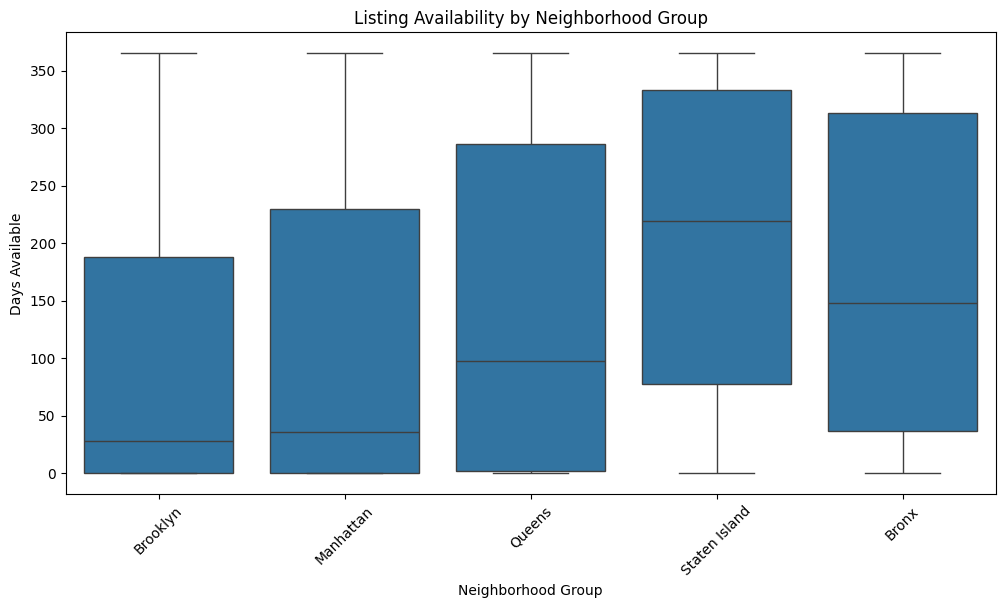

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='neighbourhood_group', y='availability_365', data=df)
plt.title('Listing Availability by Neighborhood Group')
plt.xlabel('Neighborhood Group')
plt.ylabel('Days Available')
plt.xticks(rotation=45)
plt.show()


**10. Analysis of Pricing Strategy**

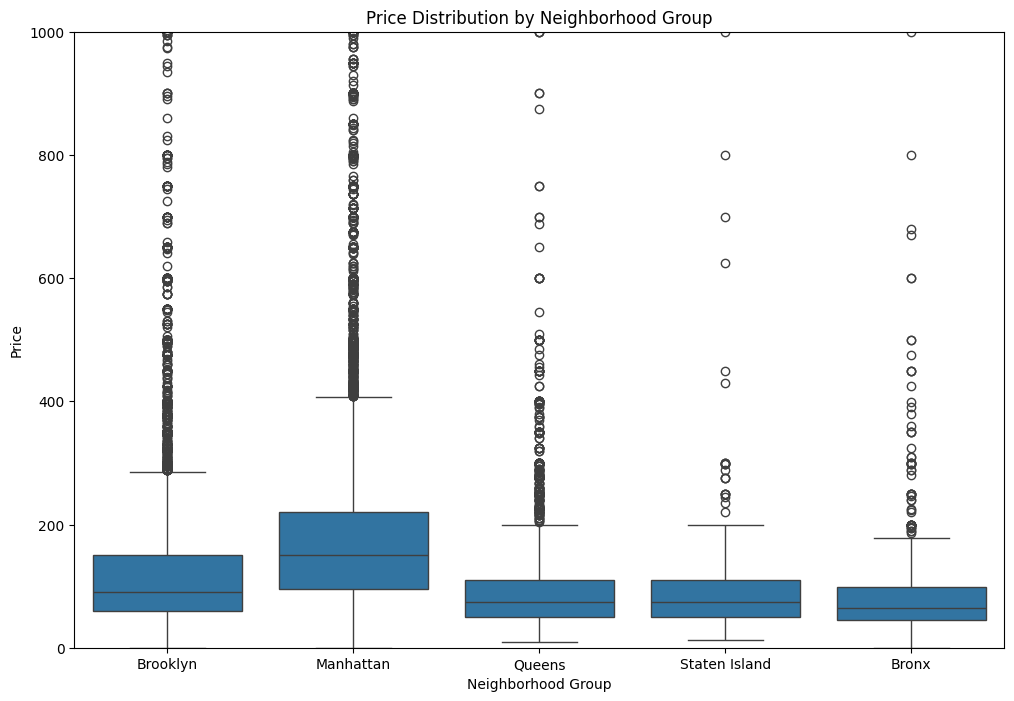

In [ ]:
#Price Distribution by Neighborhood Group
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='neighbourhood_group', y='price')
plt.title('Price Distribution by Neighborhood Group')
plt.xlabel('Neighborhood Group')
plt.ylabel('Price')
plt.ylim(0, 1000)  # Limiting to remove extreme outliers for better visualization
plt.show()


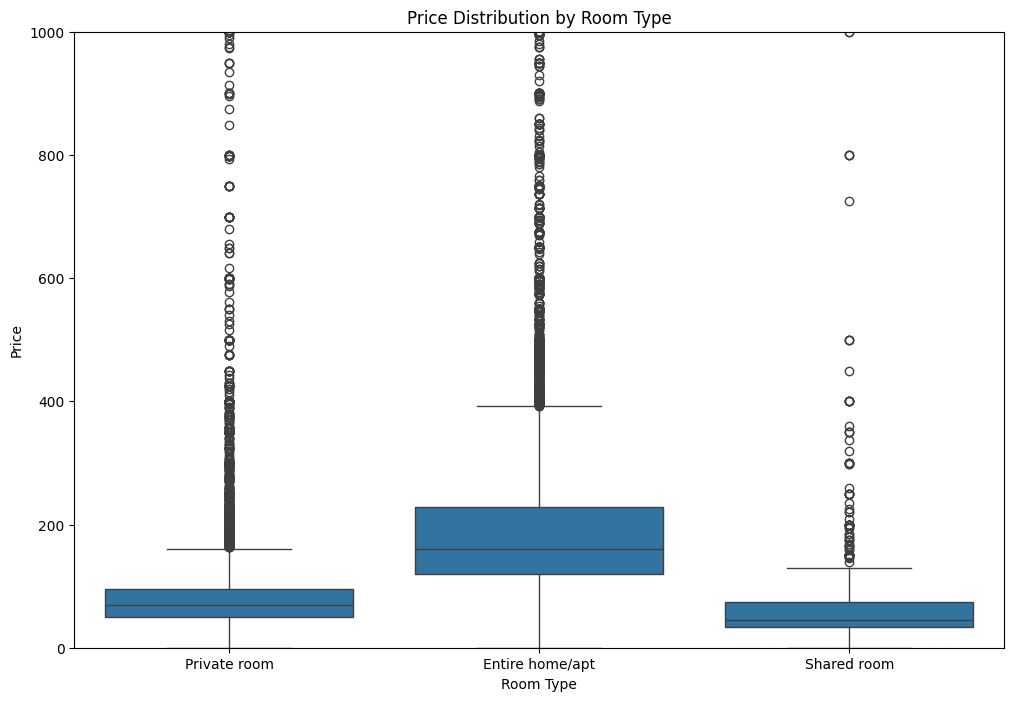

In [ ]:
#Price Distribution by Room Type
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='room_type', y='price')
plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.ylim(0, 1000)  # Similar limit for consistency
plt.show()


**Insights of DV Sector:**
1. **Geographical Pricing:** Prices vary by location, indicating higher costs in certain areas.
2. **Market Composition:** Most listings are entire homes/apartments, with price differences across neighborhoods.
3. **Price Distribution:** Many listings are affordably priced, with a concentration in the lower to mid-range.
4. **Popularity and Demand:** Listings with more reviews tend to be cheaper, suggesting higher turnover for budget options. The price-review correlation is weak.
5. **Host Dynamics:** A few hosts manage multiple listings, indicating professional or commercial hosts.
6. **Regulatory Insights:** Minimum stay requirements vary by area and room type, possibly due to regulations or host preferences.
7. **Correlation Insights:** Weak correlations between price, minimum nights, reviews, and availability show market complexity.
8. **Review Analysis:** Number of reviews serves as a proxy for popularity, with no strong link to price.
9. **Availability Trends:** Listings show varied yearly availability, suggesting strategic management by hosts.

**Analyzing the Significance of Features**
1. **Geographic Location**: The visualizations highlight the significant impact of location on rental prices. Different neighborhoods show distinct price ranges, indicating location as a key predictor of price.
2. **Room Type**: The market composition analysis (pie charts and boxplots) reveals differences in prices among room types (entire homes/apartments, private rooms, and shared rooms), suggesting room type as another important feature.
3. **Host Dynamics**: Data on the number of listings per host and their distribution might indicate that hosts with multiple listings could affect prices through professional management or higher quality listings.


**Hypothesis Formulation**
**Hypothesis 1:** Listings in Manhattan are significantly more expensive than those in other boroughs due to higher demand and location desirability.
**Hypothesis 2: **Entire homes/apartments command higher prices than private or shared rooms, reflecting the value of privacy and space.
**Hypothesis 3:** Hosts with a higher number of listings charge more for their rentals, possibly due to better management or quality.
(need hypothesis testing in the next steps)

**Key Insights**
1. Location is the predominant factor affecting Airbnb rental prices in NYC.
2. Room type significantly influences pricing, with entire homes/apartments being pricier.
3. The role of host dynamics in pricing suggests a professionalization of listings among certain hosts.

**Challenges Faced**
1. Limited direct data on guest satisfaction or quality of listings, requiring proxies like number of reviews.
2. Potential confounding factors not accounted for in the analysis, such as seasonal variations or special events.
3. Data quality issues, including missing values or outliers, could skew results.

**Potential Areas for Improvement**
1. Gathering temporal data would allow for the analysis of trends over time and the impact of seasonality on rental prices and demand.
2. Gathering review rating data.



In [ ]:
# Define features and target variable
features = ['neighbourhood_group', 'room_type', 'latitude', 'longitude', 'number_of_reviews', 'reviews_per_month', 'minimum_nights', 'availability_365']
target = 'price'
X = df[features]
y = df[target]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
# Handling categorical and numerical data
categorical_features = ['neighbourhood_group', 'room_type']
numerical_features = ['latitude', 'longitude', 'number_of_reviews', 'reviews_per_month', 'minimum_nights', 'availability_365']

# Create transformers for preprocessing
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('imputer', SimpleImputer(strategy='mean'))
])

# Combine transformers into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [ ]:
# Create a modeling pipeline that includes preprocessing and a regressor
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [ ]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Fit the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('imputer',
                                                                   SimpleImputer())]),
                                                  ['latitude', 'longitude',
                                                   'number_of_reviews',
                                                   'reviews_per_month',
                                                   'minimum_nights',
                                                   'availability_365']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['neighbourhood_group',
                                                   'room_type'])])),
                ('regressor', LinearRegression())])

In [ ]:
# Predict and evaluate
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 197.1627940761285


In [ ]:
reg = model.named_steps['regressor']

In [ ]:
# Coefficients
coefficients = reg.coef_
# Intercept
intercept = reg.intercept_

In [ ]:
categorical_features_transformed = model.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out()
numerical_features_transformed = numerical_features

In [ ]:
feature_names = np.concatenate((numerical_features_transformed, categorical_features_transformed))

In [ ]:
equation = "price = " + " + ".join([f"{coef:.3f}*{feature}" for coef, feature in zip(coefficients, feature_names)]) + f" + {intercept:.3f}"

print("Regression Equation:")
print(equation)


Regression Equation:
price = -10.401*latitude + -24.091*longitude + -15.584*number_of_reviews + 4.633*reviews_per_month + -0.460*minimum_nights + 24.306*availability_365 + 31.366*x0_Bronx + 0.621*x0_Brooklyn + 60.009*x0_Manhattan + 28.406*x0_Queens + -120.401*x0_Staten Island + 82.002*x1_Entire home/apt + -22.307*x1_Private room + -59.695*x1_Shared room + 92.630


- Geographical Features (latitude, longitude):
The model suggests that both **latitude and longitude** significantly affect rental prices, with coefficients indicating that **locations further from certain reference points (likely central, popular areas) tend to have lower prices.**
- Review Dynamics (number_of_reviews, reviews_per_month):
 - **number_of_reviews**: More reviews correlate negatively with price, implying that frequently reviewed (possibly more popular or more frequently rented) properties are cheaper.
 - **reviews_per_month: **A higher review frequency per month suggests a positive impact on price, potentially reflecting higher demand or turnover.
- Rental Terms (minimum_nights, availability_365):
 - **minimum_nights:** Longer minimum stays are slightly negatively correlated with price, suggesting that listings requiring longer commitments might be priced more competitively.
 - **availability_365:** Greater availability throughout the year positively influences price, indicating that listings with fewer restrictions on booking dates may command higher prices.
- Location Specifics (x0_Bronx, x0_Brooklyn, etc.):
These coefficients represent one-hot encoded categories for the neighbourhood_group. Each coefficient shows how prices vary across different boroughs relative to a reference category, likely indicating that **Manhattan (given its positive coefficient) is more expensive compared to others**.
- Property Type (x1_Entire home/apt, x1_Private room, x1_Shared room):
These reflect the type of rental. **Entire homes/apartments command significantly higher prices compared to private and shared rooms. Shared rooms show a substantial negative correlation with price, indicating they are the cheapest options available.**

PROBLEM STATEMENT: The goal of this project is to predict the rental prices of Airbnb listings in New York City based on a set of geographical, property-specific, and host-related features. The model aims to provide stakeholders, including property owners, renters, and market analysts, with insights into the factors that significantly impact rental prices, enabling better decision-making regarding property investments, pricing strategies, and market positioning.

MODEL VALIDATION AND TESTING

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5, scoring='neg_root_mean_squared_error')
print("Cross-Validated RMSE Scores:", -scores)
print("Average RMSE:", -scores.mean())

Cross-Validated RMSE Scores: [263.73490833 201.11126851 200.04228478 215.65710941 253.56003589]
Average RMSE: 226.82112138434505


Experimenting with different ML MODELS:
1. Linear Models
- Linear Regression
- Ridge Regression
- Lasso Regression

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import train_test_split


X = df.drop('price', axis=1)
y = df['price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define which columns are numeric and categorical
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

# Create transformers for numerical and categorical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine transformations into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Create a complete pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())])

# Fit the model
model.fit(X_train, y_train)

# Predict and calculate RMSE
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Linear Regression RMSE: {rmse}")


Linear Regression RMSE: 222.9357719685219


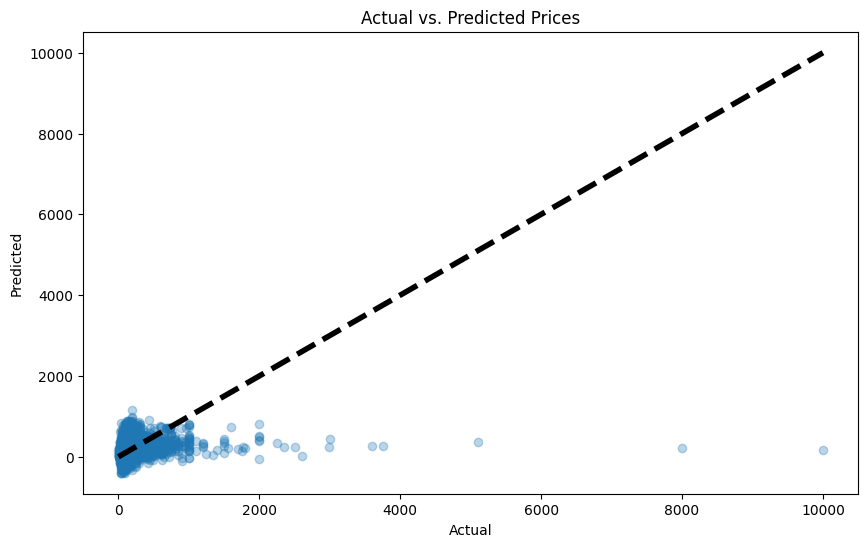

In [ ]:
import matplotlib.pyplot as plt

# Predictions on the test set
y_pred = model.predict(X_test)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)  # Line for perfect predictions
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Prices')
plt.show()

- Blue Dots (Predicted Prices): Each blue dot represents a predicted price for a corresponding actual price from your test dataset. The position on the x-axis shows the actual price, and the position on the y-axis shows the predicted price.
- Dashed Black Line (Line of Perfect Prediction): This line runs diagonally from the bottom left to the top right of the plot. If a prediction were perfect, the corresponding blue dot would lie exactly on this line, indicating that the predicted value equals the actual value.

- Concentration at Lower Prices:
The cluster of blue dots at the lower end of the price range suggests that the model has a higher density of predictions within a lower price range. This might indicate that your model is more frequently exposed to or better at predicting lower-priced listings, which is typical if your training data similarly has more low-priced examples.
- Deviation from the Line:
The blue dots are mostly below the line at higher actual price values. This indicates a tendency of the model to underpredict the higher prices.
Some dots are near the line in the lower price range, suggesting better prediction accuracy there.

The model performs relatively well for lower-priced properties but struggles with accurately predicting higher-priced properties, typically underestimating them.

In [ ]:
from sklearn.linear_model import Ridge
X = df.drop('price', axis=1)
y = df['price']

numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Create a column transformer to apply different preprocessing to categorical and numerical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())]), numerical_cols),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))]), categorical_cols)
    ])

# Create a Ridge Regression pipeline
ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=1.0))  # You can adjust the alpha value as needed
])

ridge_pipeline.fit(X_train, y_train)

# Predict and calculate RMSE on the test set
y_pred = ridge_pipeline.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Ridge Regression RMSE: {rmse}")

Ridge Regression RMSE: 195.14551536792388


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define a range of alpha values for Ridge Regression
param_grid = {
    'regressor__alpha': [0.1, 1.0, 10.0, 100.0]
}

# Create a GridSearchCV to find the best alpha
grid_search = GridSearchCV(ridge_pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train, y_train)

# Best alpha value
print("Best alpha:", grid_search.best_params_)
best_rmse = np.sqrt(-grid_search.best_score_)
print("Best RMSE:", best_rmse)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best alpha: {'regressor__alpha': 10.0}
Best RMSE: 231.14535483911587


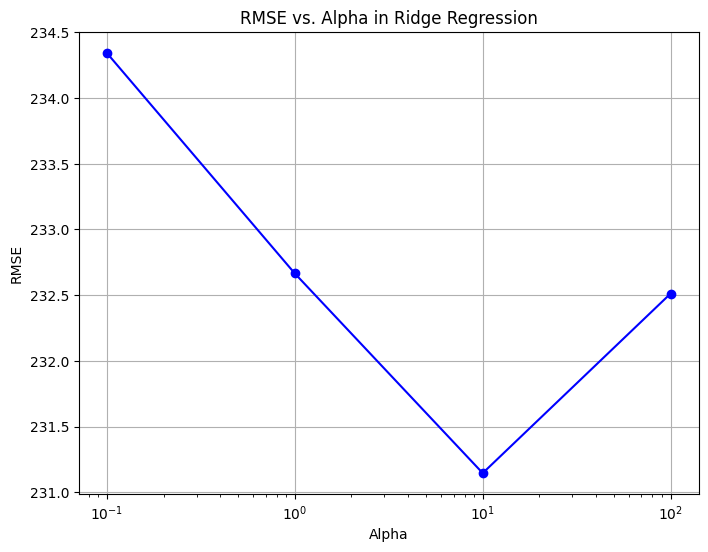

In [ ]:
mean_test_scores = -grid_search.cv_results_['mean_test_score']
alphas = [param['regressor__alpha'] for param in grid_search.cv_results_['params']]

# Calculate RMSE from the mean test scores
rmse_scores = np.sqrt(mean_test_scores)

# Plotting the RMSE against alpha values
plt.figure(figsize=(8, 6))
plt.plot(alphas, rmse_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Alpha')
plt.ylabel('RMSE')
plt.title('RMSE vs. Alpha in Ridge Regression')
plt.xscale('log')  # Since alpha values vary exponentially, a log scale can be more informative
plt.grid(True)
plt.show()

A lower RMSE value indicates better performance. You can observe how increasing or decreasing alpha affects the RMSE. Ideally, you want to choose an alpha that gives the lowest RMSE while ensuring that the model does not overfit or underfit.

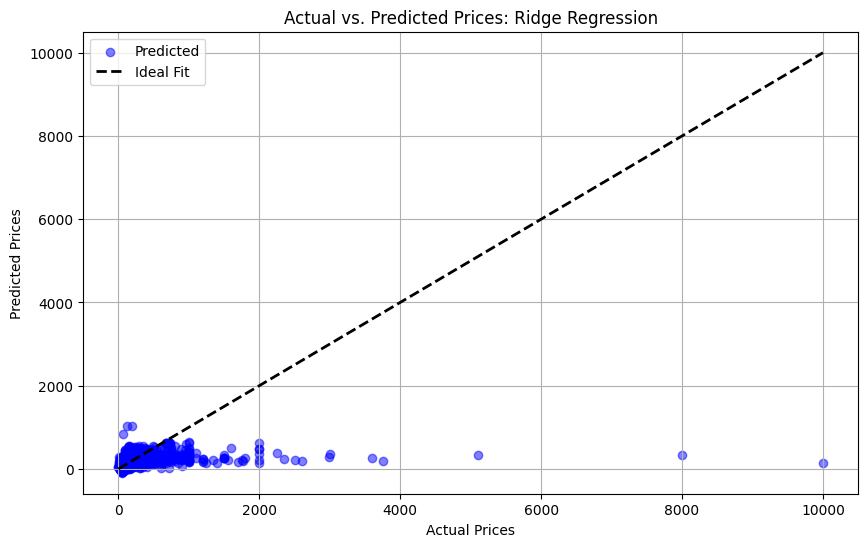

In [ ]:
best_ridge_model = grid_search.best_estimator_

y_pred = best_ridge_model.predict(X_test)

import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal Fit')  # Ideal fit line
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices: Ridge Regression')
plt.legend()
plt.grid(True)
plt.show()


- Blue Dots (Predicted Prices): Each dot represents a prediction from the model where the x-coordinate is the actual price of a listing and the y-coordinate is the predicted price by the model.
- Dashed Black Line (Ideal Fit): This line represents perfect predictions. If every prediction was perfect, all the blue dots would lie on this line.

The model seems to predict lower prices fairly well as the concentration of blue dots near the line at lower prices is fairly dense.

As prices increase, the predictions tend to deviate more significantly from the actual prices, with the model underestimating the higher prices.

In [ ]:
from sklearn.linear_model import Lasso

X = df.drop('price', axis=1)
y = df['price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numerical_features = ['latitude', 'longitude', 'number_of_reviews', 'reviews_per_month', 'minimum_nights', 'availability_365']
categorical_features = ['neighbourhood_group', 'room_type']

# Creating a column transformer to handle numerical and categorical data preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())]), numerical_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))]), categorical_features)
    ])

# Creating a Lasso Regression pipeline
lasso_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=0.1))  # Alpha can be tuned to optimize performance
])

In [ ]:
# Fit the model on the training data
lasso_pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred = lasso_pipeline.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Lasso Regression RMSE: {rmse}")

Lasso Regression RMSE: 197.15277460407586


In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())]), numerical_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))]), categorical_features)
    ])

lasso_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=0.1, max_iter=10000))  # Appropriately increased max_iter
])

param_grid = {
    'regressor__alpha': [0.001, 0.01, 0.1, 1, 10, 100]
}

# Setup the grid search
grid_search = GridSearchCV(lasso_pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, return_train_score=True)
grid_search.fit(X_train, y_train)

# Best alpha value
best_alpha = grid_search.best_params_['regressor__alpha']
print("Best alpha:", best_alpha)

# Best RMSE
best_rmse = np.sqrt(-grid_search.best_score_)
print("Best RMSE from GridSearchCV:", best_rmse)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best alpha: 0.01
Best RMSE from GridSearchCV: 235.27849340567403


In [ ]:
best_lasso_model = grid_search.best_estimator_

# Generate predictions on the test dataset
y_pred = best_lasso_model.predict(X_test)

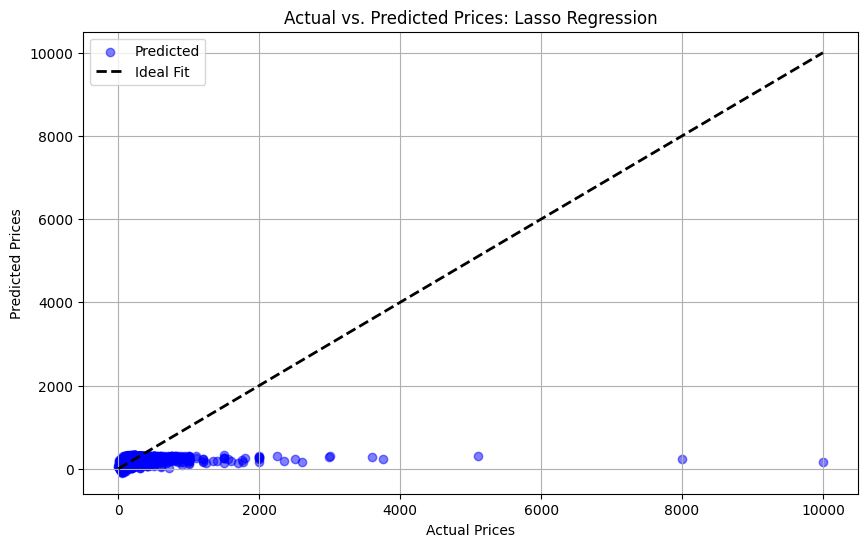

In [ ]:
# Scatter plot of actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='Predicted')  # Plot predicted prices
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal Fit')  # Line for perfect predictions
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices: Lasso Regression')
plt.legend()
plt.grid(True)
plt.show()

- Most of the predicted prices cluster tightly around the lower actual prices, indicating that the Lasso model is quite accurate in this range.
- As with Linear and Ridge regression, the model's predictions spread out as the actual prices increase, suggesting less accuracy. Notably, there is a clear tendency for the model to underpredict higher prices, as many points lie below the line.

The density of points near the lower price range suggests that the model has more data points and potentially better learning in this segment. The spread increases with the price, indicating variability in the model's ability to accurately predict higher-priced listings.

FEATURE ENGINEERING FOR TREE MODELS

Random Forest

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Assume numerical_features and categorical_features are defined as before
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),  # Using median for imputation
            ('poly', PolynomialFeatures(degree=2, include_bias=False))  # Adding polynomial features
        ]), numerical_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)
    ])

# Fit this into your training pipeline for a Random Forest for example
from sklearn.ensemble import RandomForestRegressor

rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
rf_pipeline.fit(X_train, y_train)

# Predict and calculate accuracy
from sklearn.metrics import mean_squared_error
y_pred = rf_pipeline.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Random Forest RMSE: {rmse}")

Random Forest RMSE: 190.57884721864005


Decision tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Setup the Decision Tree Pipeline
dt_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

# Fit the model
dt_pipeline.fit(X_train, y_train)

# Predict and calculate RMSE
y_pred_dt = dt_pipeline.predict(X_test)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
print(f"Decision Tree RMSE: {rmse_dt}")

Decision Tree RMSE: 306.8251088286459


The higher RMSE from the Decision Tree model compared to the Random Forest and potentially other models is a common outcome, especially in complex datasets or those with lots of features. Decision Trees are prone to overfitting, particularly if they're allowed to grow deep without constraints.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(
        max_depth=10,  # Prevents the tree from growing too deep
        min_samples_split=20,  # Higher values prevent the model from creating overly specific rules
        min_samples_leaf=10,  # Ensures each leaf has enough samples to make a general rule
        random_state=42))
])

dt_pipeline.fit(X_train, y_train)
y_pred_dt = dt_pipeline.predict(X_test)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
print(f"Improved Decision Tree RMSE: {rmse_dt}")


Improved Decision Tree RMSE: 202.5299817395477


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Setup the Gradient Boosting Pipeline
gb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42))
])

# Fit the model
gb_pipeline.fit(X_train, y_train)

# Predict and calculate RMSE
y_pred_gb = gb_pipeline.predict(X_test)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
print(f"Gradient Boosting RMSE: {rmse_gb}")


Gradient Boosting RMSE: 194.34080942617658


- Random Forest (RMSE: 190.578): This model has provided the lowest RMSE, suggesting that it's the best at generalizing among the models tested.
- Gradient Boosting (RMSE: 194.340): Close to Random Forest but slightly higher RMSE, which means it's quite effective but might be slightly overfitting compared to Random Forest.
- Improved Decision Tree (RMSE: 202.529): The highest RMSE among the three, but significantly improved from the original Decision Tree model.


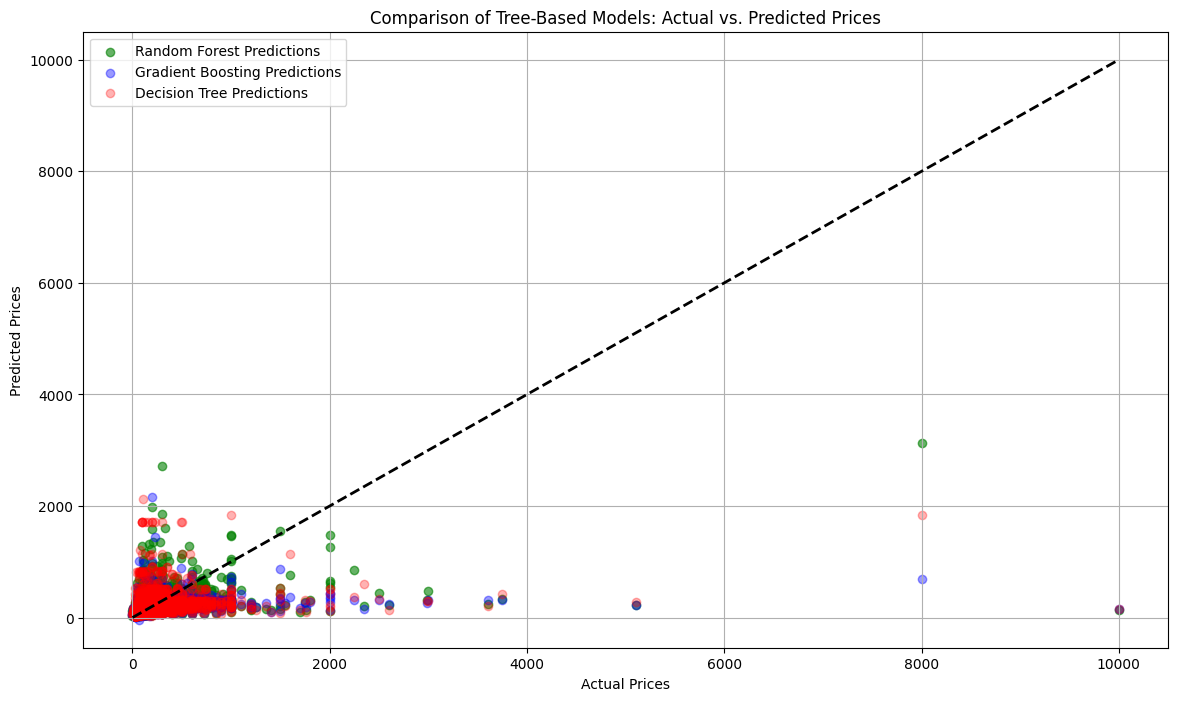

In [ ]:
import matplotlib.pyplot as plt

# Scatter plots for each model
plt.figure(figsize=(14, 8))
plt.scatter(y_test, y_pred, alpha=0.6, color='green', label='Random Forest Predictions')
plt.scatter(y_test, y_pred_gb, alpha=0.4, color='blue', label='Gradient Boosting Predictions')
plt.scatter(y_test, y_pred_dt, alpha=0.3, color='red', label='Decision Tree Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Ideal fit line
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Comparison of Tree-Based Models: Actual vs. Predicted Prices')
plt.legend()
plt.grid(True)
plt.show()


- Random Forest predictions are clustered more closely to the ideal fit line, especially in the lower and middle price ranges, indicating good accuracy.
- Gradient Boosting also shows good clustering around the ideal fit line, comparable to Random Forest, but with slightly more spread in the middle price range.
There are some predictions at higher price points which are reasonably close to the ideal line, indicating that Gradient Boosting handles high-priced outliers a bit better than Random Forest.
- The Decision Tree predictions show greater spread and are less consistent, especially at higher price points. This indicates higher variance and potentially overfitting, even though the model has been improved.
- The density of predictions near the zero price point and up to around $2000 is very high for all models, indicating a lot of data points in this range and possibly a better training focus here. The models are likely more tuned to typical prices and might require more data or feature adjustments to better predict the outliers or very high prices.

In [ ]:
from sklearn.utils import compute_sample_weight

# Example of applying a logarithmic transformation to price and using it as a target
y_train_log = np.log(y_train + 1)  # Adding 1 to avoid log(0)

# Compute weights to give more importance to high-priced listings
weights = compute_sample_weight('balanced', y_train)

# Modify the random forest to use these weights
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Fit the model with weights
rf_pipeline.fit(X_train, y_train_log, regressor__sample_weight=weights)

# Transform predictions back after prediction
y_pred_rf_log = np.exp(rf_pipeline.predict(X_test)) - 1
rmse_rf_log = np.sqrt(mean_squared_error(y_test, y_pred_rf_log))
print(f"Adjusted Random Forest RMSE: {rmse_rf_log}")


Adjusted Random Forest RMSE: 189.78415988129126


In [ ]:
y_pred_rf = rf_pipeline.predict(X_test)

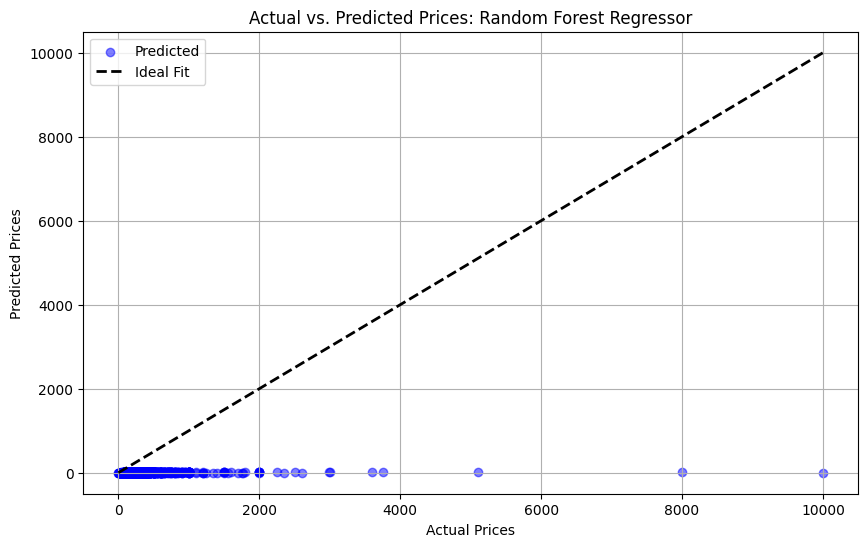

In [ ]:
import matplotlib.pyplot as plt

# Creating the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='blue', label='Predicted')  # Predicted values
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal Fit')  # Line for perfect predictions
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices: Random Forest Regressor')
plt.legend()
plt.grid(True)
plt.show()

Support Vector Machine Regressor

In [ ]:
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Setting up the preprocessor
# Assuming 'numerical_features' and 'categorical_features' are lists of your data's feature names
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())]), numerical_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))]), categorical_features)
    ])

# Creating the SVR pipeline
svr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('svr', SVR(kernel='rbf'))  # Kernel can be 'linear', 'poly', 'rbf', 'sigmoid'
])

# Train the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
svr_pipeline.fit(X_train, y_train)

# Predict and calculate RMSE
y_pred_svr = svr_pipeline.predict(X_test)
rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr))
print(f"SVR RMSE: {rmse_svr}")


SVR RMSE: 198.85808463069625


Multi-Layer Perceptron (MLP) for Regression

In [ ]:
from sklearn.neural_network import MLPRegressor

# Creating the MLP pipeline
mlp_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('mlp', MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=500, random_state=42))
])

# Train the model
mlp_pipeline.fit(X_train, y_train)

# Predict and calculate RMSE
y_pred_mlp = mlp_pipeline.predict(X_test)
rmse_mlp = np.sqrt(mean_squared_error(y_test, y_pred_mlp))
print(f"MLP RMSE: {rmse_mlp}")


MLP RMSE: 193.89203508591686


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.



In [ ]:
from sklearn.neural_network import MLPRegressor

mlp_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('mlp', MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam',
                         max_iter=1000, learning_rate_init=0.001, batch_size=200,
                         early_stopping=True, validation_fraction=0.1, random_state=42))
])

# Train the model
mlp_pipeline.fit(X_train, y_train)

# Predict and calculate RMSE
y_pred_mlp = mlp_pipeline.predict(X_test)
rmse_mlp = np.sqrt(mean_squared_error(y_test, y_pred_mlp))
print(f"MLP RMSE: {rmse_mlp}")



MLP RMSE: 194.14735202355476


In [ ]:
# Predictions from the SVR model
y_pred_svr = svr_pipeline.predict(X_test)

# Predictions from the MLP model
y_pred_mlp = mlp_pipeline.predict(X_test)


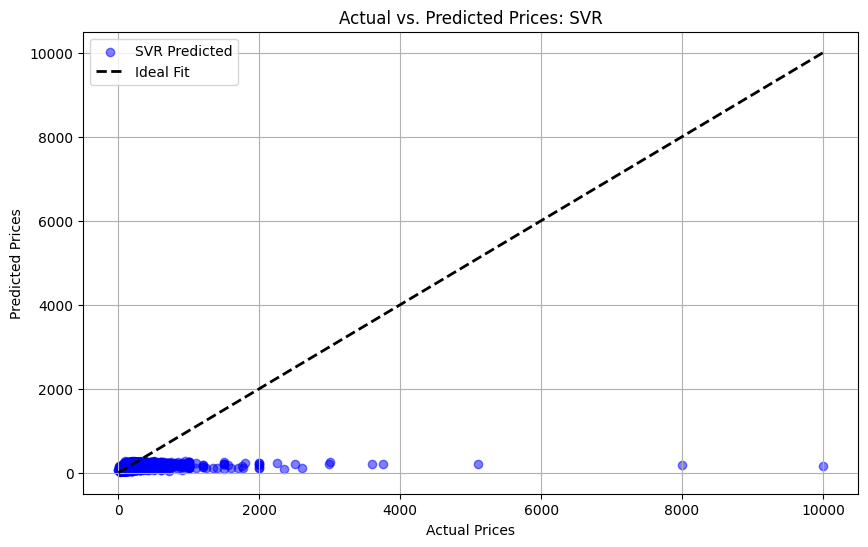

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot for SVR predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_svr, alpha=0.5, color='blue', label='SVR Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal Fit')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices: SVR')
plt.legend()
plt.grid(True)
plt.show()


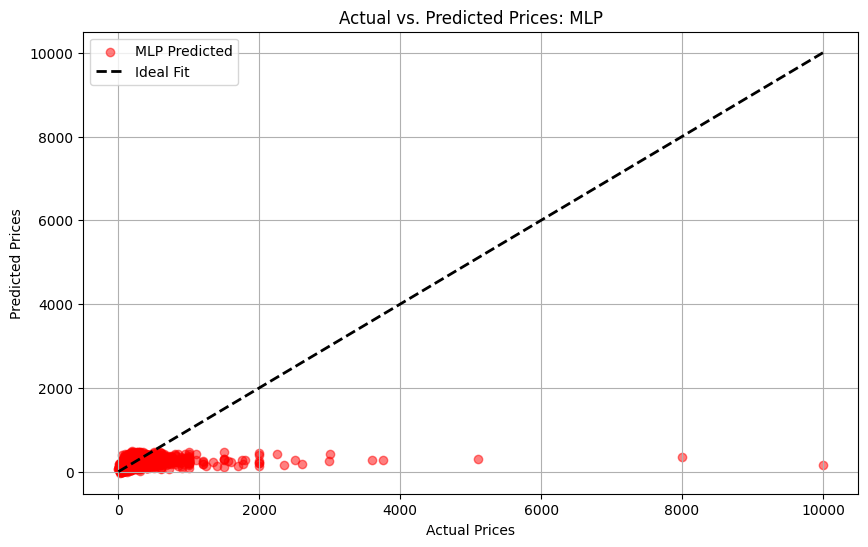

In [ ]:
 # Scatter plot for MLP predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_mlp, alpha=0.5, color='red', label='MLP Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal Fit')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices: MLP')
plt.legend()
plt.grid(True)
plt.show()


- The SVR model seems to predict lower price points relatively well but struggles significantly as the actual prices increase. Most predictions cluster at the lower end and do not scale up well with actual prices, particularly noticeable for higher-priced listings.
- The MLP model shows a similar trend to the SVR but with slightly more spread across the price range. It too predominantly predicts lower prices accurately but starts to deviate more as the price increases.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

def get_feature_names(column_transformer):
    """Get feature names from a column transformer."""
    col_name = []

    # Loop through each transformer in the ColumnTransformer
    for transformer_in_columns in column_transformer.transformers_[:-1]:  # Exclude the last transformer ('remainder')
        raw_col_name = transformer_in_columns[2]

        if isinstance(transformer_in_columns[1], Pipeline):
            # If pipeline, get the last transformer
            transformer = transformer_in_columns[1].steps[-1][1]
        else:
            transformer = transformer_in_columns[1]

        if isinstance(transformer, OneHotEncoder):
            names = list(transformer.get_feature_names_out(raw_col_name))
        elif hasattr(transformer, 'categories_'):
            names = [f"{raw_col_name}_{cat}" for cat in transformer.categories_[0]]
        else:
            try:
                names = list(transformer.get_feature_names_out())
            except AttributeError:
                names = [f"{raw_col_name}_{i}" for i in range(transformer.n_output_features_)]

        col_name.extend(names)

    return col_name

# Example usage
# Assuming 'rf_pipeline' is your pipeline and it includes a 'preprocessor' as the column transformer
preprocessor = rf_pipeline.named_steps['preprocessor']
feature_names_corrected = get_feature_names(preprocessor)
random_forest_importances = rf_pipeline.named_steps['regressor'].feature_importances_

# Validate the length match and print feature importances
if len(feature_names_corrected) == len(random_forest_importances):
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names_corrected,
        'Importance': random_forest_importances
    })
    print(feature_importance_df.sort_values(by='Importance', ascending=False))
else:
    print("Mismatch in lengths of features and importances")
    print("Features count:", len(feature_names_corrected))
    print("Importances count:", len(random_forest_importances))



                              Feature  Importance
12                               x1^2    0.143510
32          room_type_Entire home/apt    0.107870
10                              x0 x4    0.086248
7                               x0 x1    0.085815
15                              x1 x4    0.066502
16                              x1 x5    0.055242
1                                  x1    0.044016
13                              x1 x2    0.040634
11                              x0 x5    0.037481
25                              x4 x5    0.036632
14                              x1 x3    0.035189
6                                x0^2    0.033589
22                              x3 x4    0.032358
0                                  x0    0.031589
9                               x0 x3    0.026347
19                              x2 x4    0.024838
23                              x3 x5    0.022178
18                              x2 x3    0.020926
8                               x0 x2    0.014559


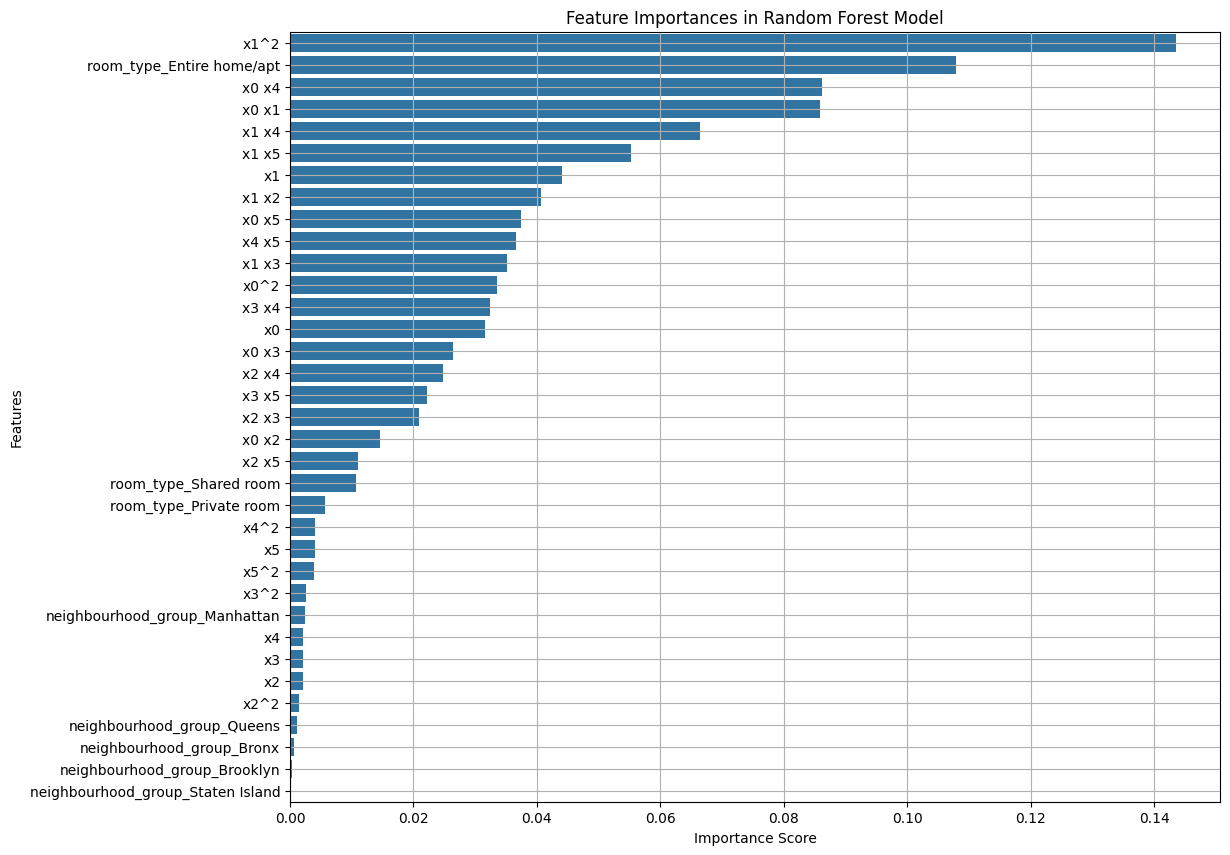

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming feature_importance_df is your DataFrame with the importances
plt.figure(figsize=(12, 10))
sns.barplot(data=feature_importance_df.sort_values('Importance', ascending=False), x='Importance', y='Feature')
plt.title('Feature Importances in Random Forest Model')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.grid(True)
plt.show()


In [ ]:
# Assuming 'preprocessor' is the name of your ColumnTransformer within a pipeline
if hasattr(rf_pipeline.named_steps['preprocessor'], 'get_feature_names_out'):
    feature_names = rf_pipeline.named_steps['preprocessor'].get_feature_names_out()
    print(feature_names)
else:
    print("Feature names extraction not supported in this sklearn version.")


['num__latitude' 'num__longitude' 'num__number_of_reviews'
 'num__reviews_per_month' 'num__minimum_nights' 'num__availability_365'
 'num__latitude^2' 'num__latitude longitude'
 'num__latitude number_of_reviews' 'num__latitude reviews_per_month'
 'num__latitude minimum_nights' 'num__latitude availability_365'
 'num__longitude^2' 'num__longitude number_of_reviews'
 'num__longitude reviews_per_month' 'num__longitude minimum_nights'
 'num__longitude availability_365' 'num__number_of_reviews^2'
 'num__number_of_reviews reviews_per_month'
 'num__number_of_reviews minimum_nights'
 'num__number_of_reviews availability_365' 'num__reviews_per_month^2'
 'num__reviews_per_month minimum_nights'
 'num__reviews_per_month availability_365' 'num__minimum_nights^2'
 'num__minimum_nights availability_365' 'num__availability_365^2'
 'cat__neighbourhood_group_Bronx' 'cat__neighbourhood_group_Brooklyn'
 'cat__neighbourhood_group_Manhattan' 'cat__neighbourhood_group_Queens'
 'cat__neighbourhood_group_Staten 

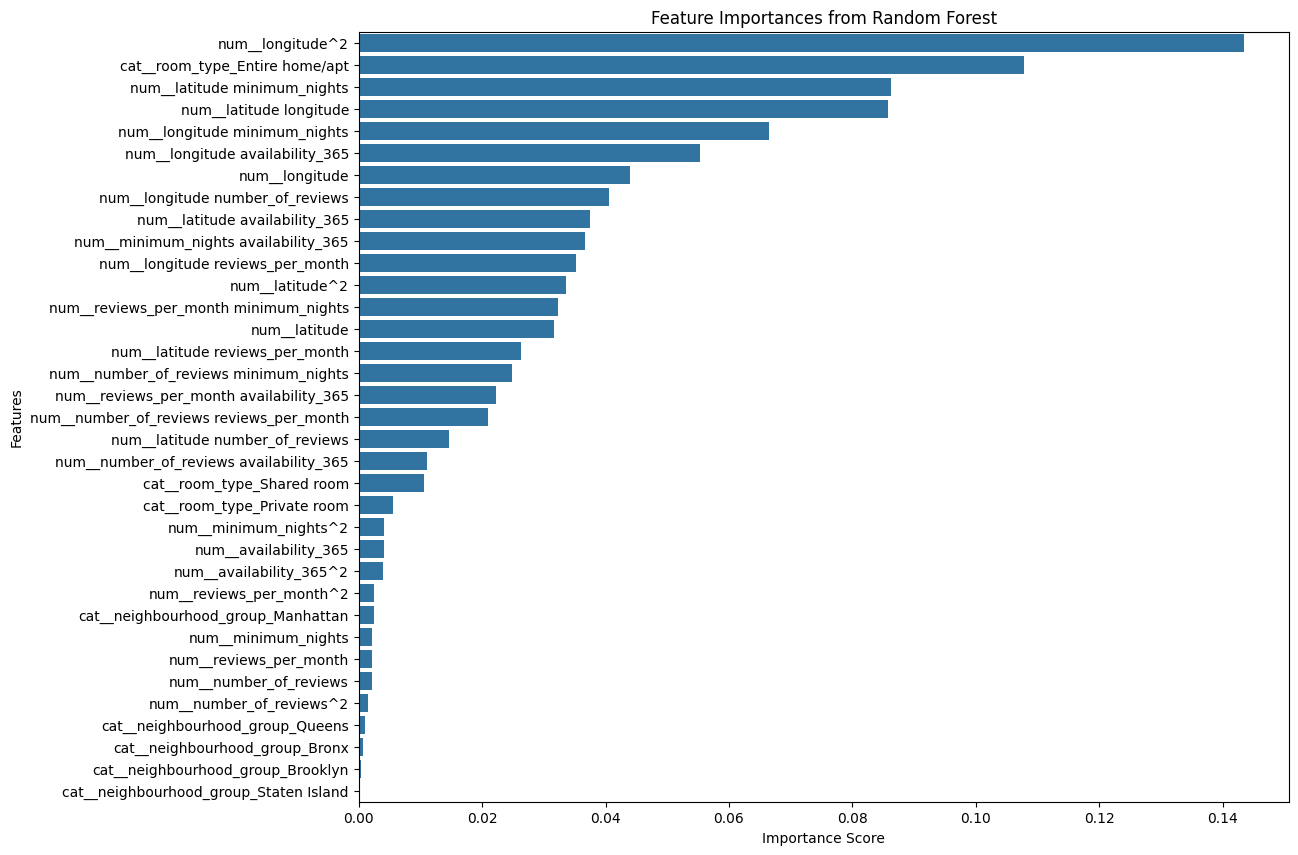

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances = rf_pipeline.named_steps['regressor'].feature_importances_

# Creating DataFrame for plotting
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Plotting feature importances
plt.figure(figsize=(12, 10))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.sort_values('Importance', ascending=False))
plt.title('Feature Importances from Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


The clubbing of features, such as in terms like num__latitude longitude, generally represents interaction terms or polynomial features that were explicitly created during the preprocessing step of your machine learning pipeline. These features are generated to help the model capture more complex relationships between variables that are not adequately described by the individual features alone.

num__latitude longitude: This feature represents the interaction between latitude and longitude. It can be particularly useful in models where the geographical location's impact on the outcome (like housing prices or weather patterns) might be non-linear or dependent on specific coordinate interactions.

num__latitude^2: This is the square of the latitude feature, which might help the model in identifying more complex patterns related to latitude, such as non-linear effects of latitude on temperature gradients or property prices.

Many relationships in real-world data are non-linear, where the effect of one variable on the outcome changes at different levels of another variable. Polynomial and interaction terms can model these non-linearities.

HYPOTHESIS TESTING

- Null Hypothesis (H0): There is no significant difference in the prices of listings between Manhattan and other boroughs.

- Alternative Hypothesis (H1): Listings in Manhattan are significantly more expensive than those in other boroughs.

In [ ]:
import pandas as pd
from scipy import stats

# Filter data to include only relevant features (borough and price)
data = df[['neighbourhood_group', 'price']]

# Performing ANOVA to see if there are statistically significant differences among groups
anova_result = stats.f_oneway(
    data[data['neighbourhood_group'] == 'Manhattan']['price'],
    data[data['neighbourhood_group'] == 'Brooklyn']['price'],
    data[data['neighbourhood_group'] == 'Queens']['price'],
    data[data['neighbourhood_group'] == 'Bronx']['price'],
    data[data['neighbourhood_group'] == 'Staten Island']['price']
)

print("ANOVA result (F-statistic and p-value):", anova_result)


ANOVA result (F-statistic and p-value): F_onewayResult(statistic=354.99483938396367, pvalue=7.723724235004603e-302)


In [ ]:
import pandas as pd
from scipy.stats import ttest_ind


# Assume your DataFrame is named df and has columns 'neighbourhood_group' and 'price'
manhattan_prices = df[df['neighbourhood_group'] == 'Manhattan']['price']
brooklyn_prices = df[df['neighbourhood_group'] == 'Brooklyn']['price']
queens_prices = df[df['neighbourhood_group'] == 'Queens']['price']
bronx_prices = df[df['neighbourhood_group'] == 'Bronx']['price']
staten_island_prices = df[df['neighbourhood_group'] == 'Staten Island']['price']

# Performing t-tests between Manhattan and each of the other boroughs
brooklyn_results = ttest_ind(manhattan_prices, brooklyn_prices, equal_var=False)
queens_results = ttest_ind(manhattan_prices, queens_prices, equal_var=False)
bronx_results = ttest_ind(manhattan_prices, bronx_prices, equal_var=False)
staten_island_results = ttest_ind(manhattan_prices, staten_island_prices, equal_var=False)

# Print the results
print("Manhattan vs Brooklyn:", brooklyn_results)
print("Manhattan vs Queens:", queens_results)
print("Manhattan vs Bronx:", bronx_results)
print("Manhattan vs Staten Island:", staten_island_results)


Manhattan vs Brooklyn: TtestResult(statistic=30.479715951312564, pvalue=1.4649940716907436e-201, df=37233.013505794115)
Manhattan vs Queens: TtestResult(statistic=32.73052863779677, pvalue=2.4091328479612908e-227, df=15667.819441111618)
Manhattan vs Bronx: TtestResult(statistic=28.867249647867617, pvalue=4.973763191603479e-154, df=2047.9016238371032)
Manhattan vs Staten Island: TtestResult(statistic=5.655517791578435, pvalue=3.027349173400217e-08, df=386.24480365966735)


F-Statistic: 354.99483938396367

P-Value: 7.723724235004603e-302

The F-statistic is extremely high, and the p-value is virtually zero. This outcome means there is a statistically significant difference in the average rental prices among the different boroughs, including Manhattan.

p-value being significantly less than 0.05 leads us to **reject the null hypothesis** that there is no difference in prices among the boroughs.

T-Tests for Manhattan vs. Other Boroughs:
- **Manhattan vs. Brooklyn**

T-Statistic: 30.4797

P-Value: 1.4649940716907436e-201

Degrees of Freedom: 37233.0135

- **Manhattan vs. Queens**

T-Statistic: 32.7305

P-Value: 2.4091328479612908e-227

Degrees of Freedom: 15667.8194

- **Manhattan vs. Bronx**

T-Statistic: 28.8672

P-Value: 4.973763191603479e-154

Degrees of Freedom: 2047.9016

- **Manhattan vs. Staten Island**

T-Statistic: 5.6555

P-Value: 3.027349173400217e-08

Degrees of Freedom: 386.2448

- The t-statistics are positive and very high, especially when comparing Manhattan to Brooklyn, Queens, and Bronx, indicating that the mean prices in Manhattan are significantly higher than in these boroughs.
- The p-values in all cases are much lower than the standard significance level of 0.05, strongly rejecting the null hypothesis for each comparison. This confirms that prices in Manhattan are statistically significantly higher than in each of the other boroughs tested.